In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bigquery-ai-hackathon/survey.txt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 1.9 MB/s eta 0:00:00


PHASE 1: AI INFRASTRUCTURE DATA COLLECTION & ANALYSIS

[1/8] Processing AI Inference Infrastructure ⚡...
  📊 Collecting national trend data...
    ✓ National data collected (262 data points)
  🗺️ Collecting tech hub state data...
    ✓ California
    ✓ Washington
    ✓ Texas
    ✓ New York
    ✓ Massachusetts
  🏙️ Collecting tech hub city data...
    ✓ San Francisco Bay Area
    ✓ Seattle
    ✓ Austin
    ✓ New York City
    ✓ Boston
  🎯 Analyzing intent-based queries...
    → Analyzing cost_optimization intent...
    → Analyzing performance intent...
    → Analyzing scaling intent...
  ✅ Comprehensive analysis completed

[2/8] Processing NVIDIA GPU Ecosystem 🎮...
  📊 Collecting national trend data...
    ✓ National data collected (262 data points)
  🗺️ Collecting tech hub state data...
    ✓ California
    ✓ Washington
    ✓ Texas
    ✓ New York
    ✓ Massachusetts
  🏙️ Collecting tech hub city data...
    ✓ San Francisco Bay Area
    ✓ Seattle
    ✓ Austin
    ✓ New York City
    ✓ B

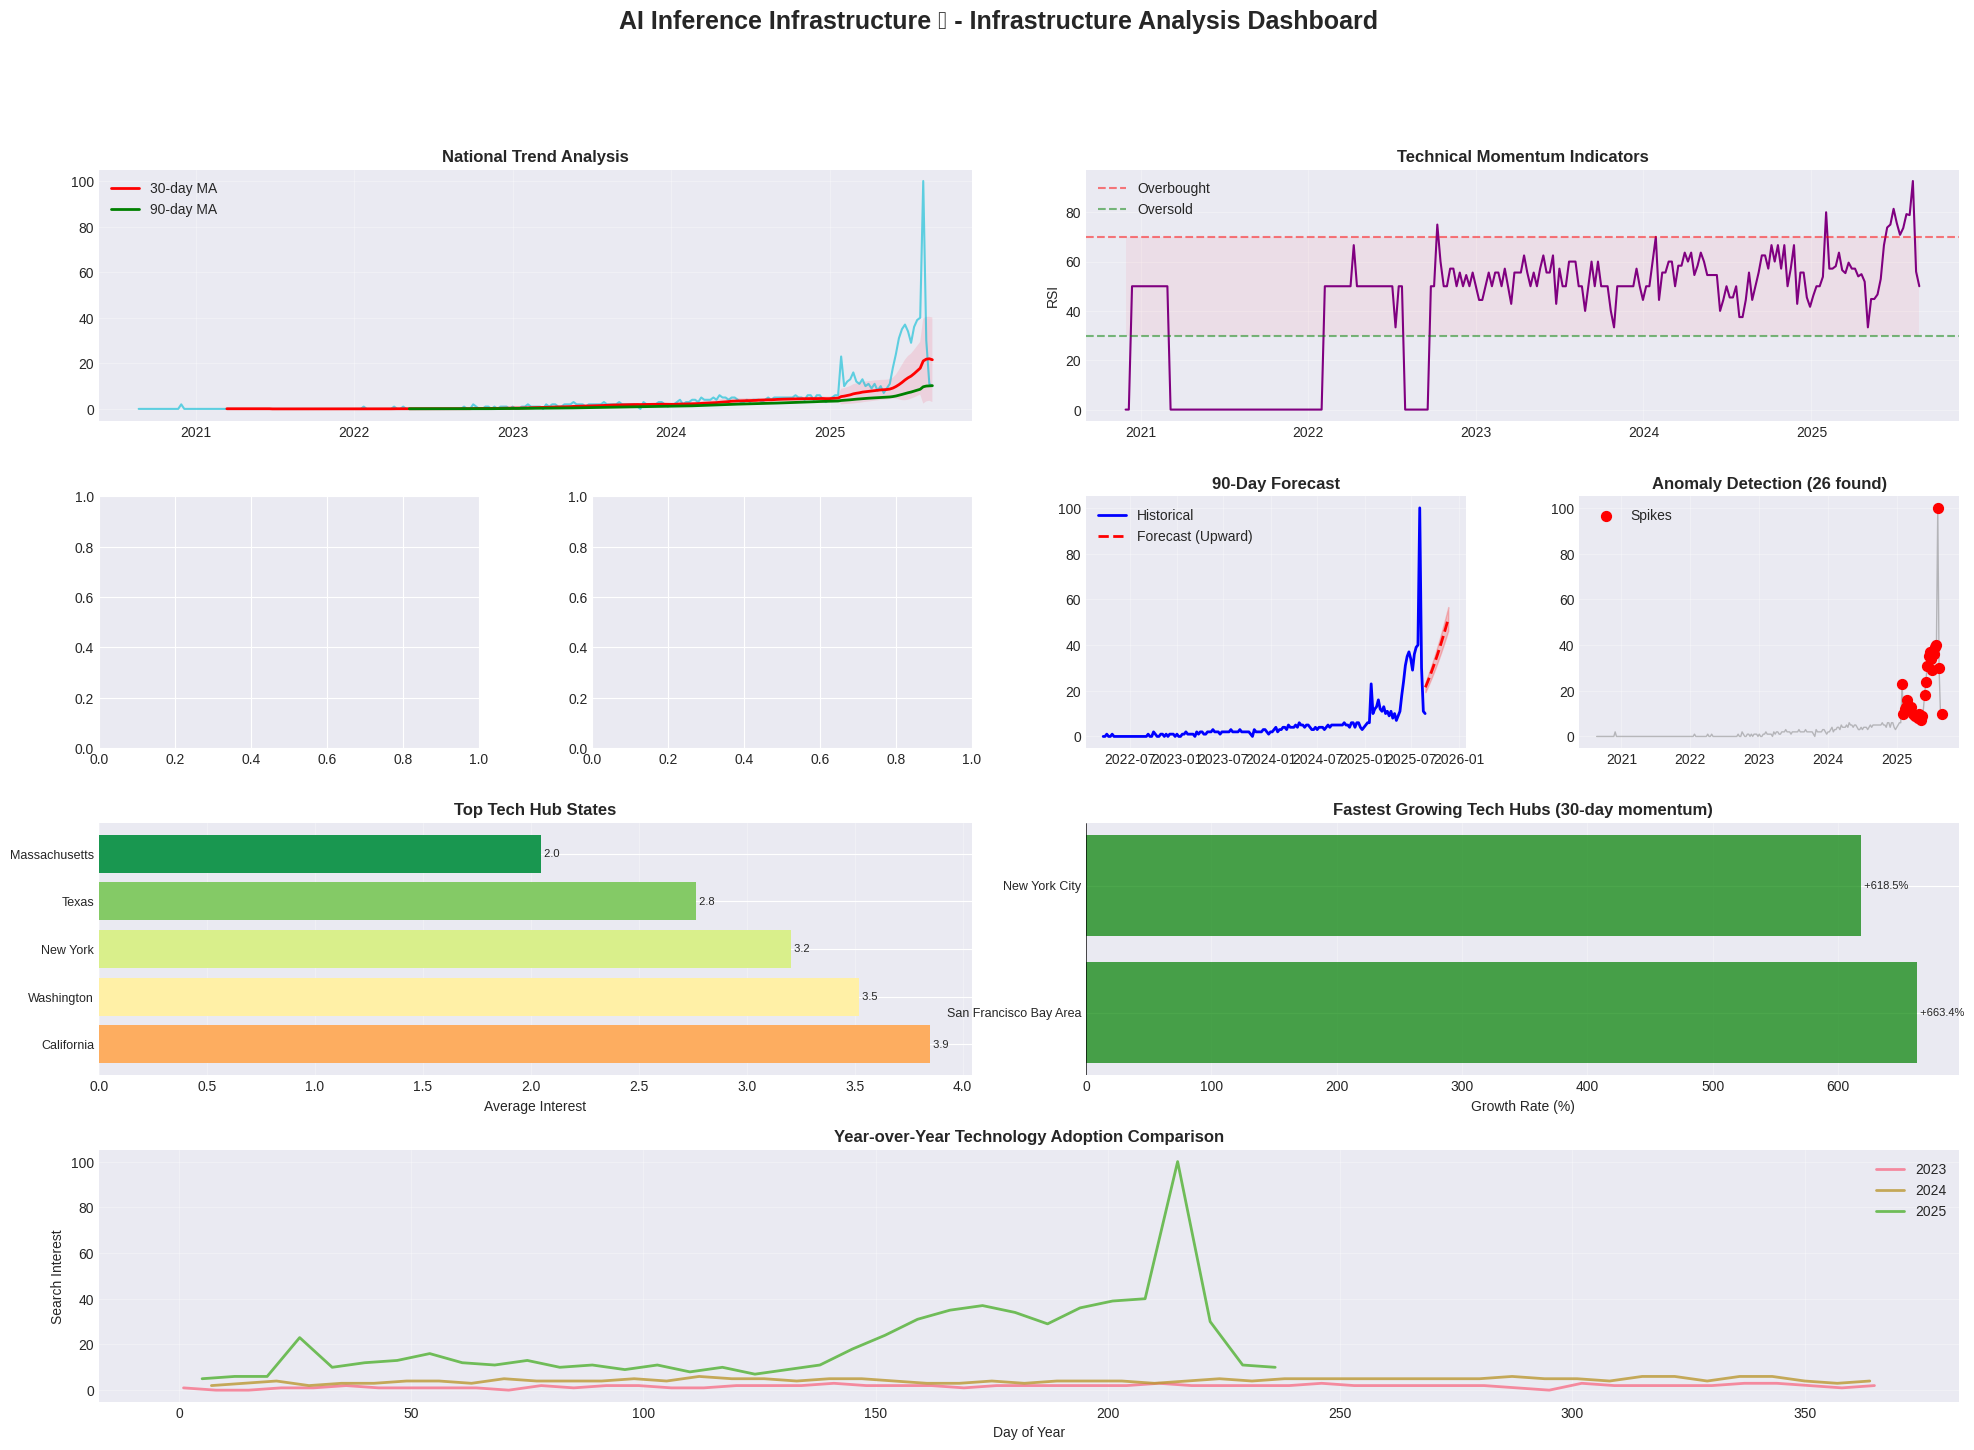

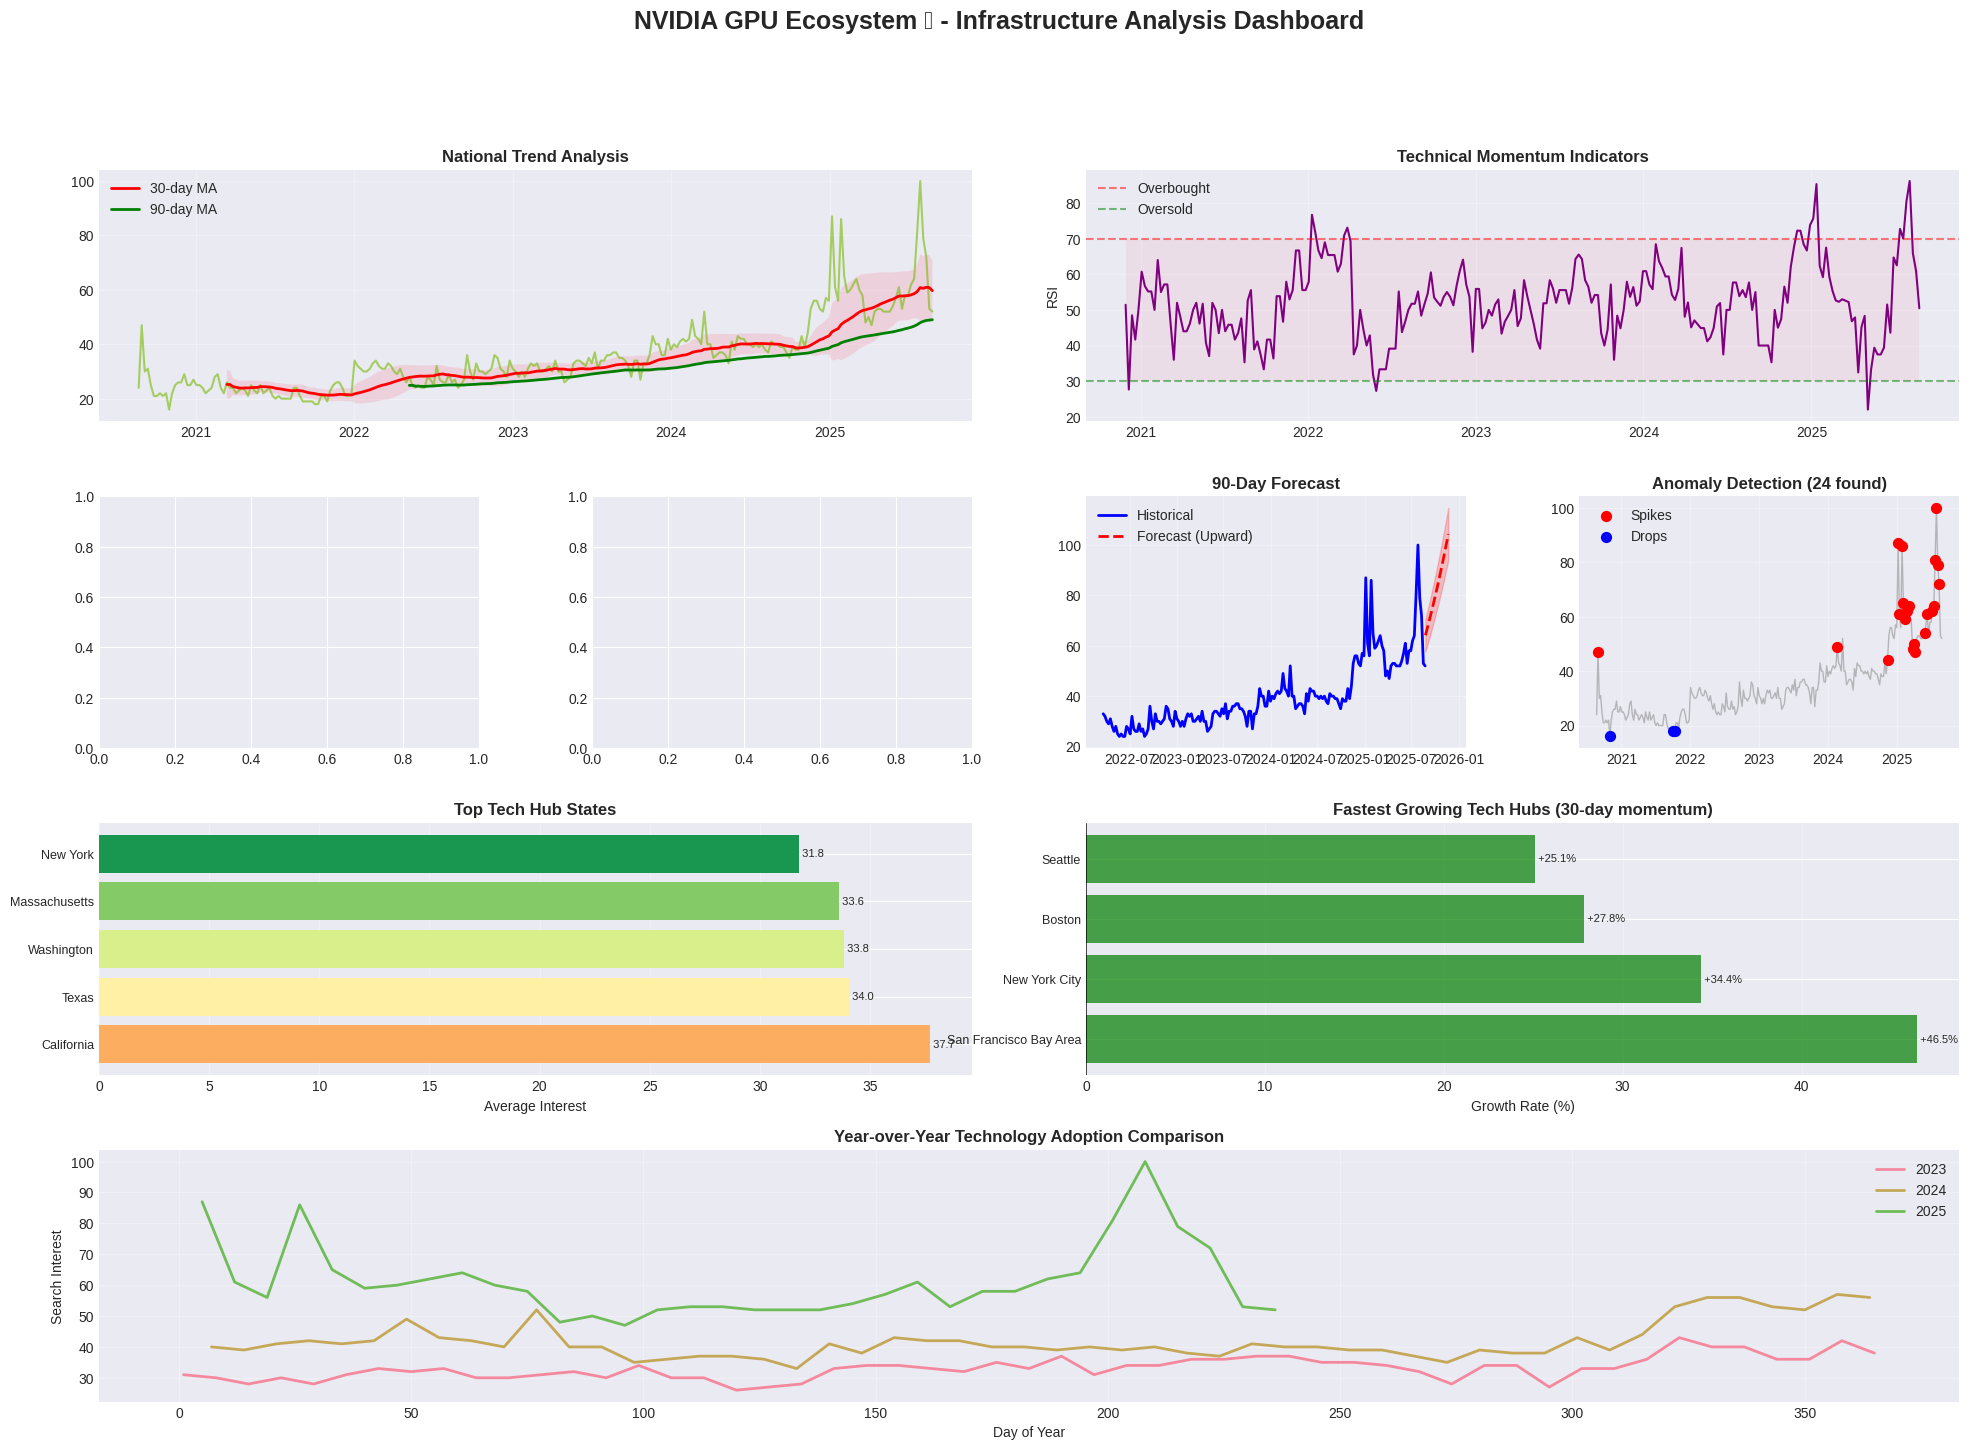

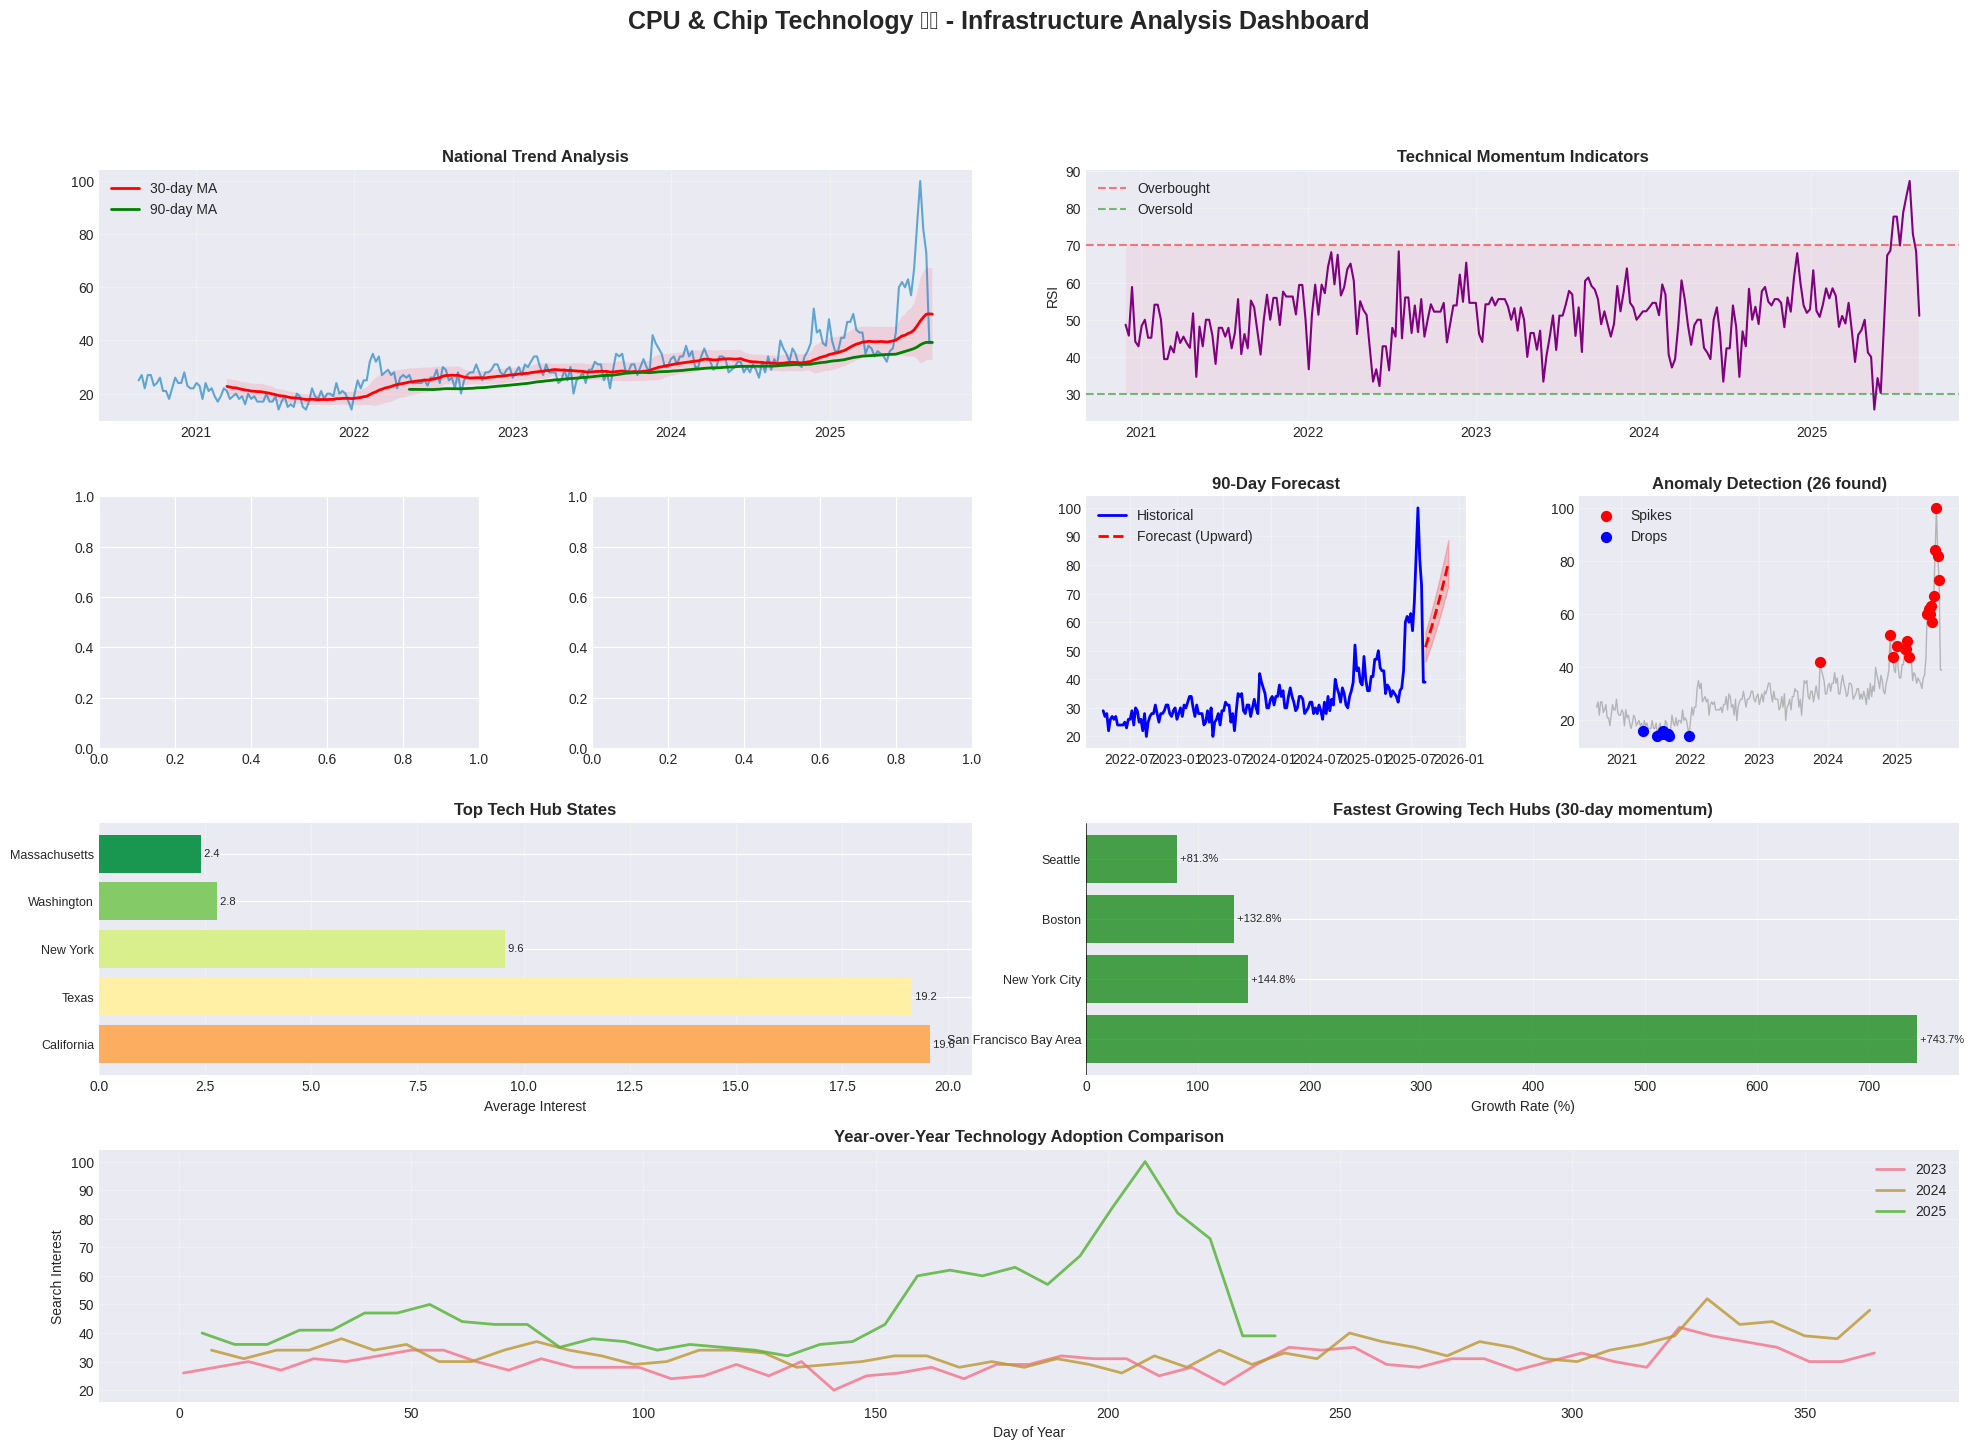

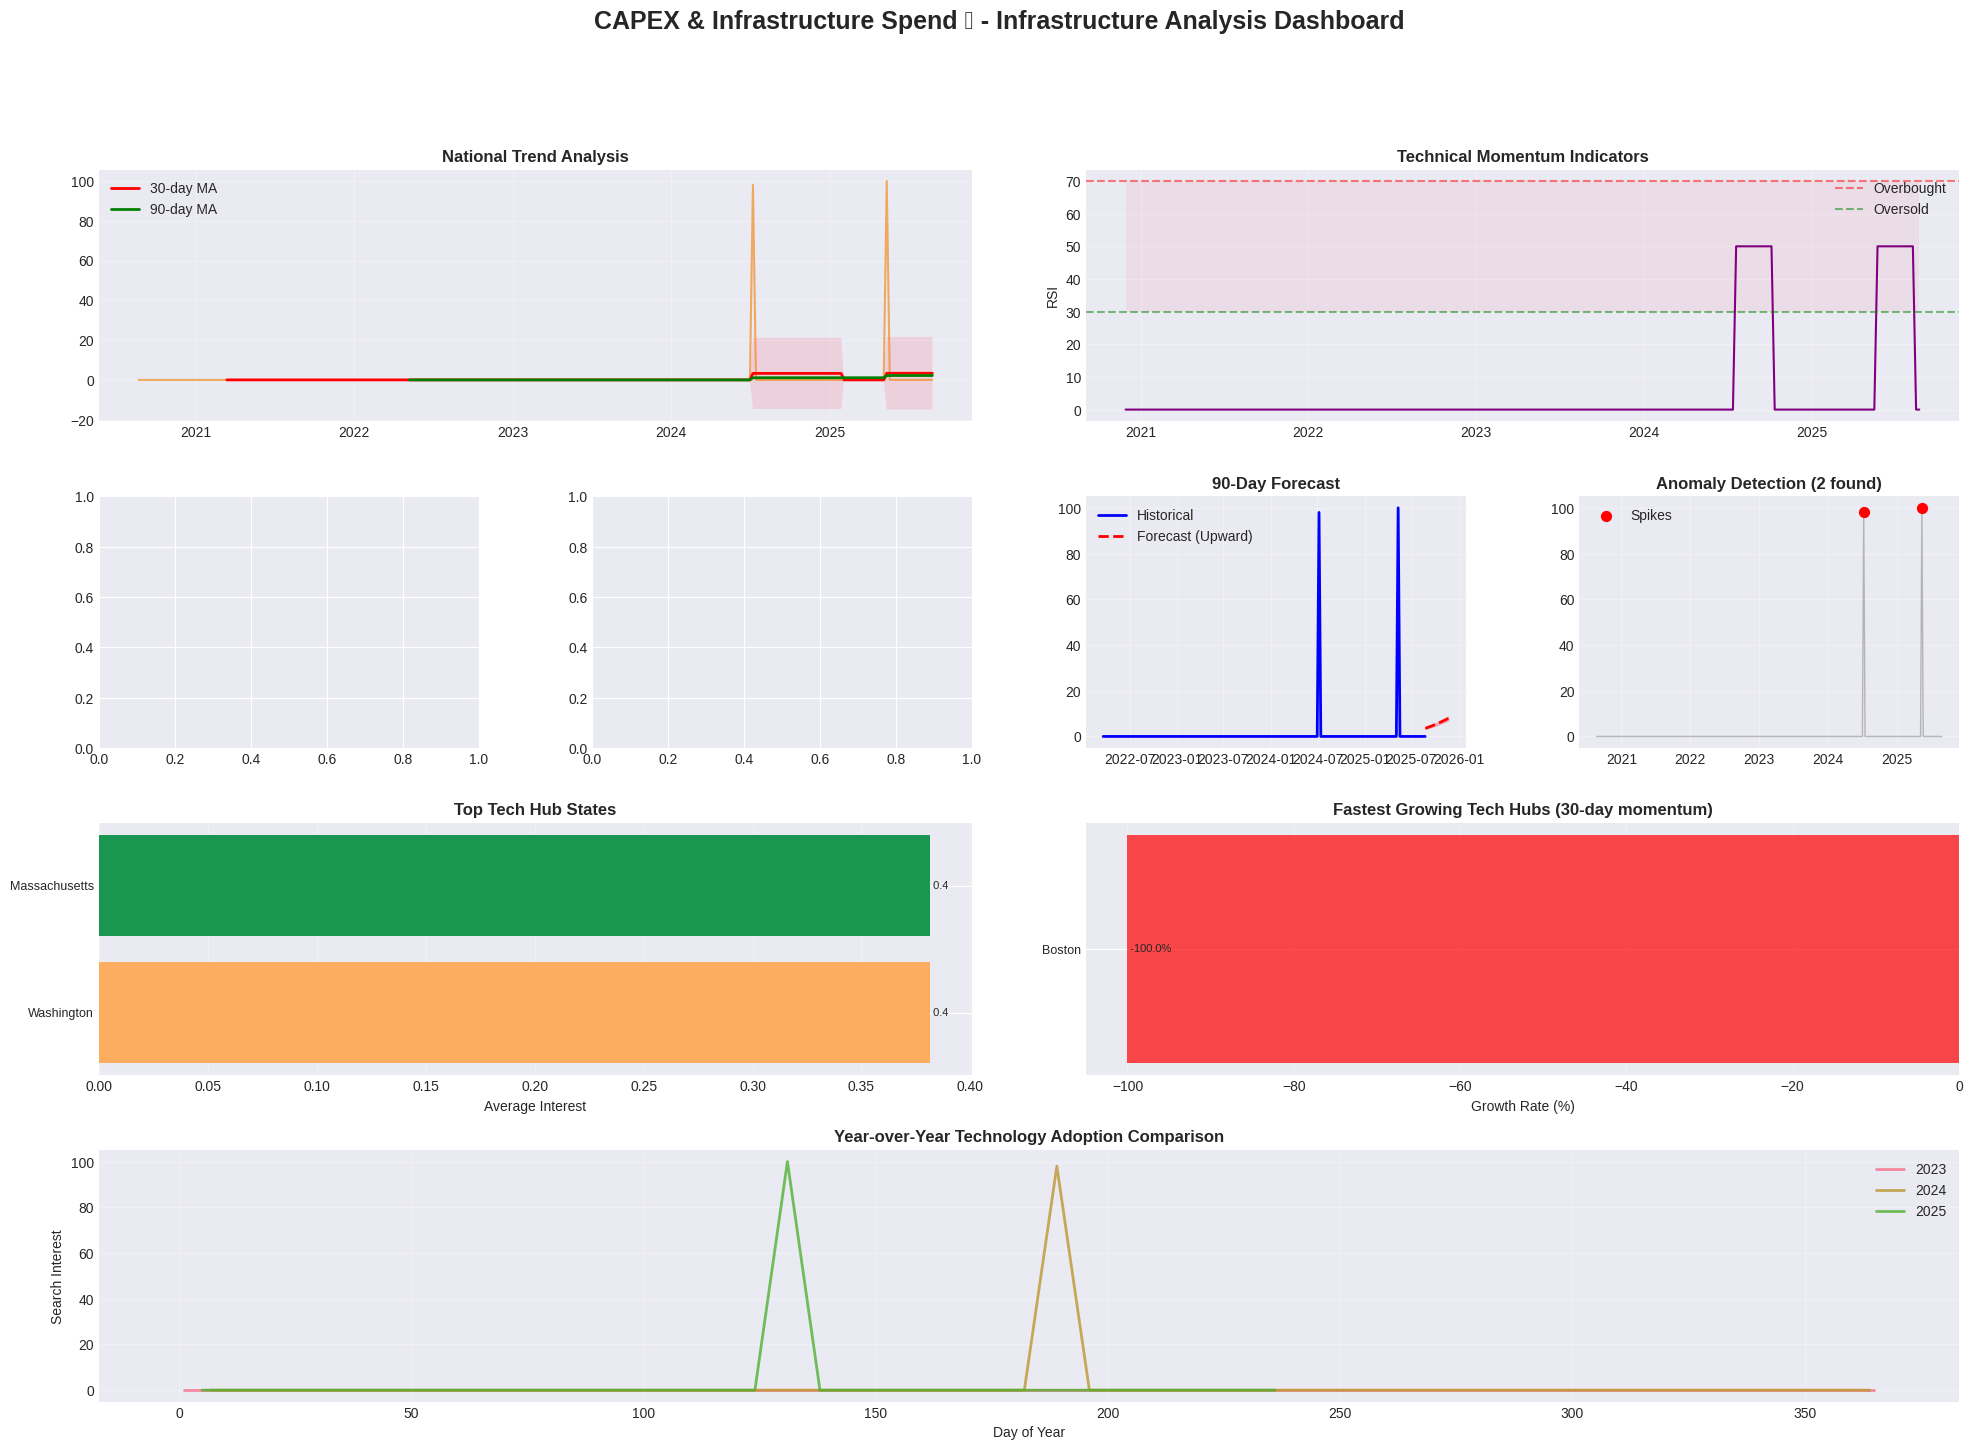

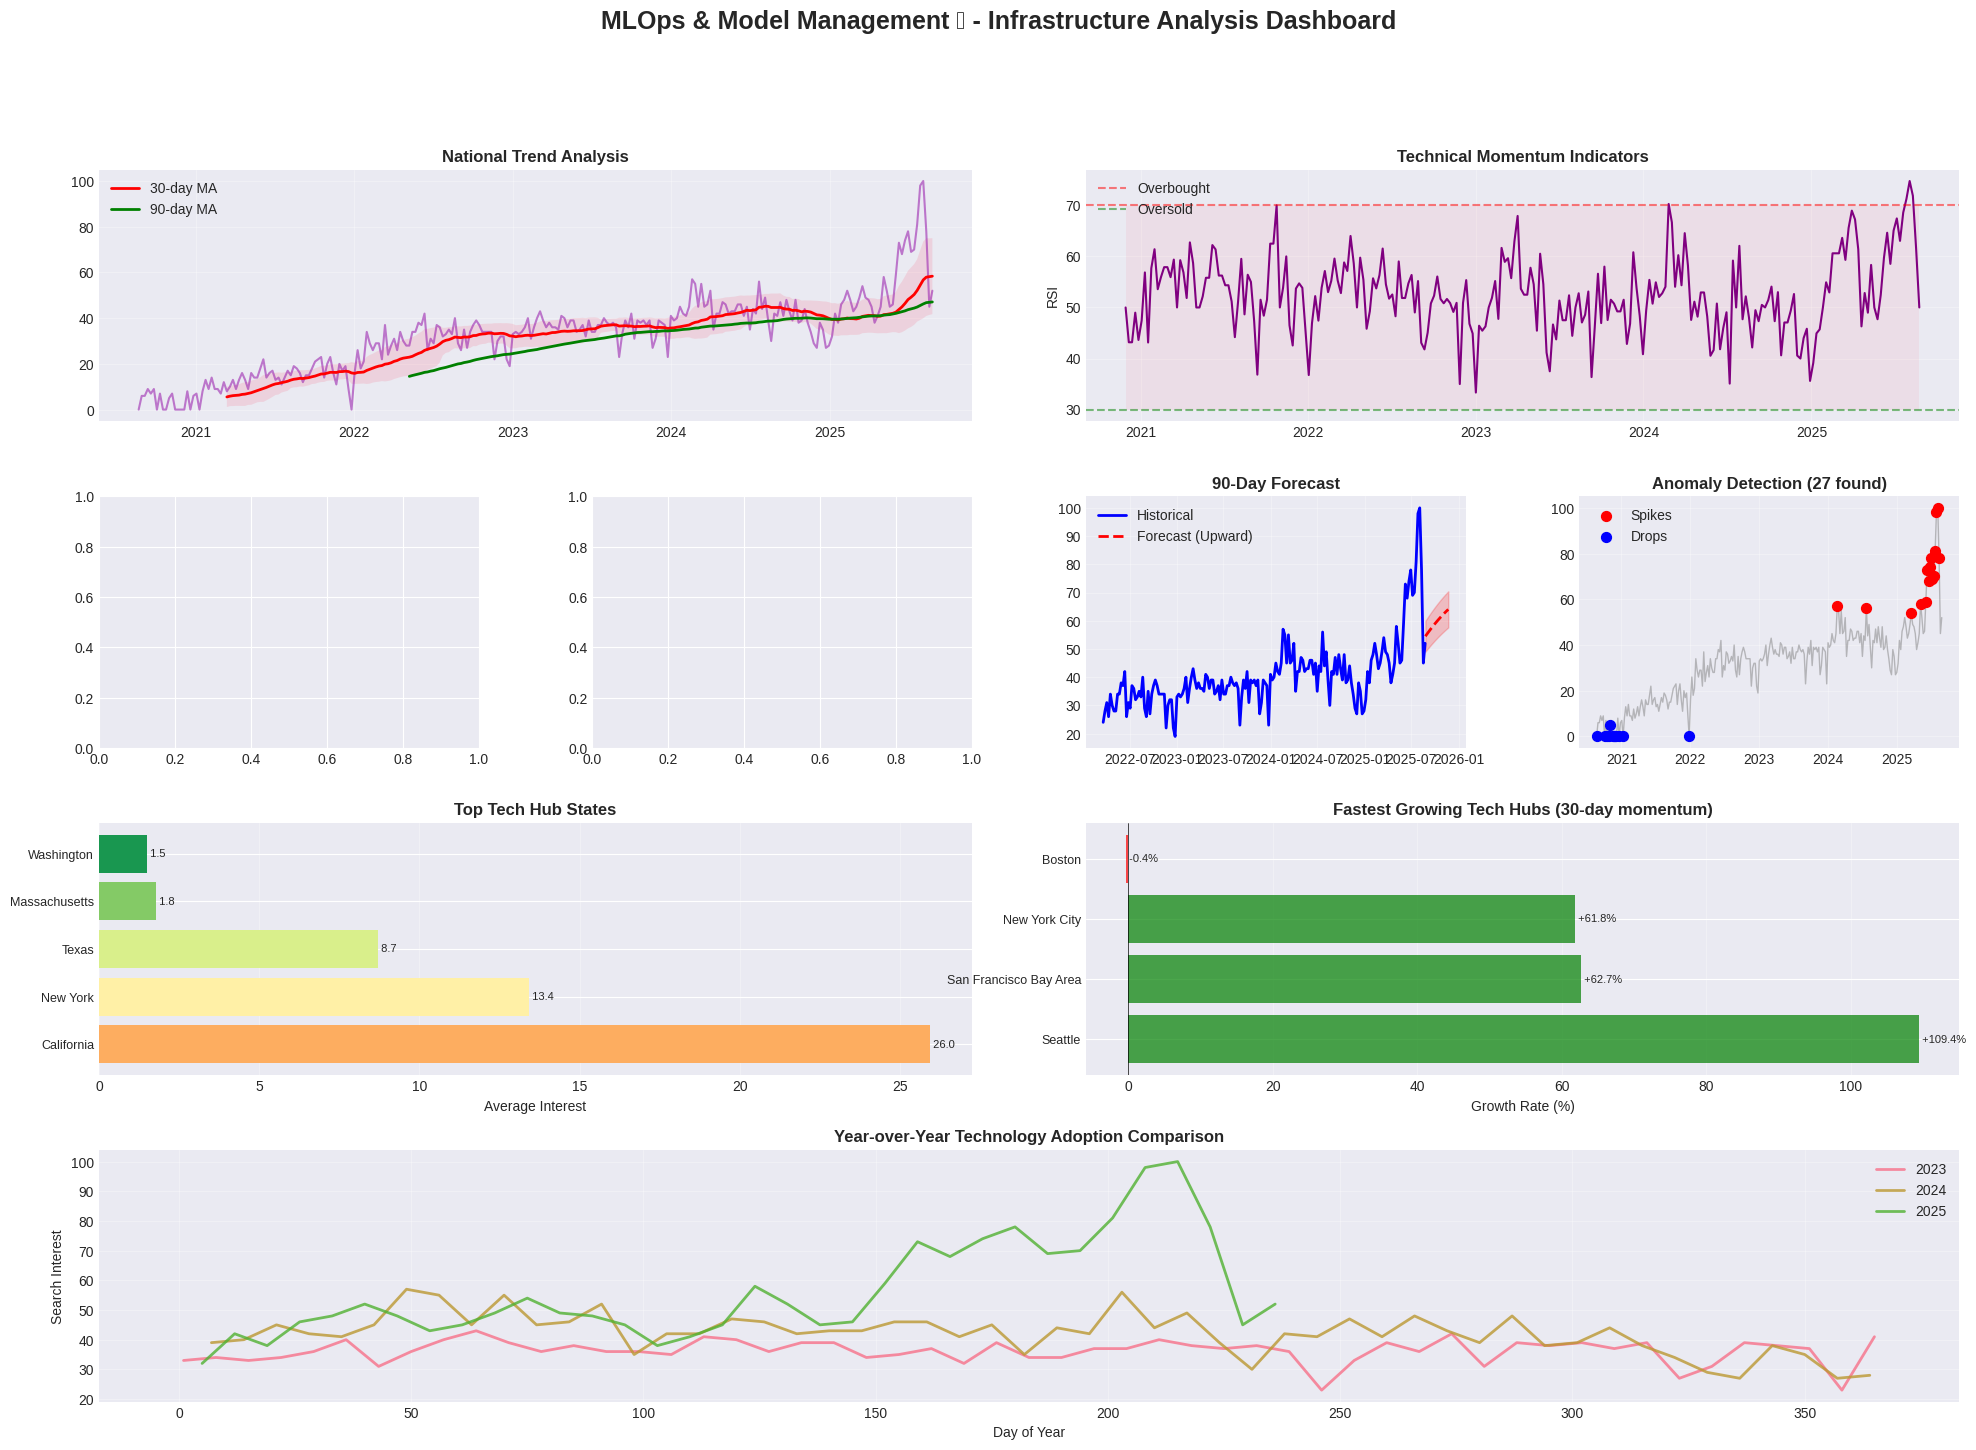

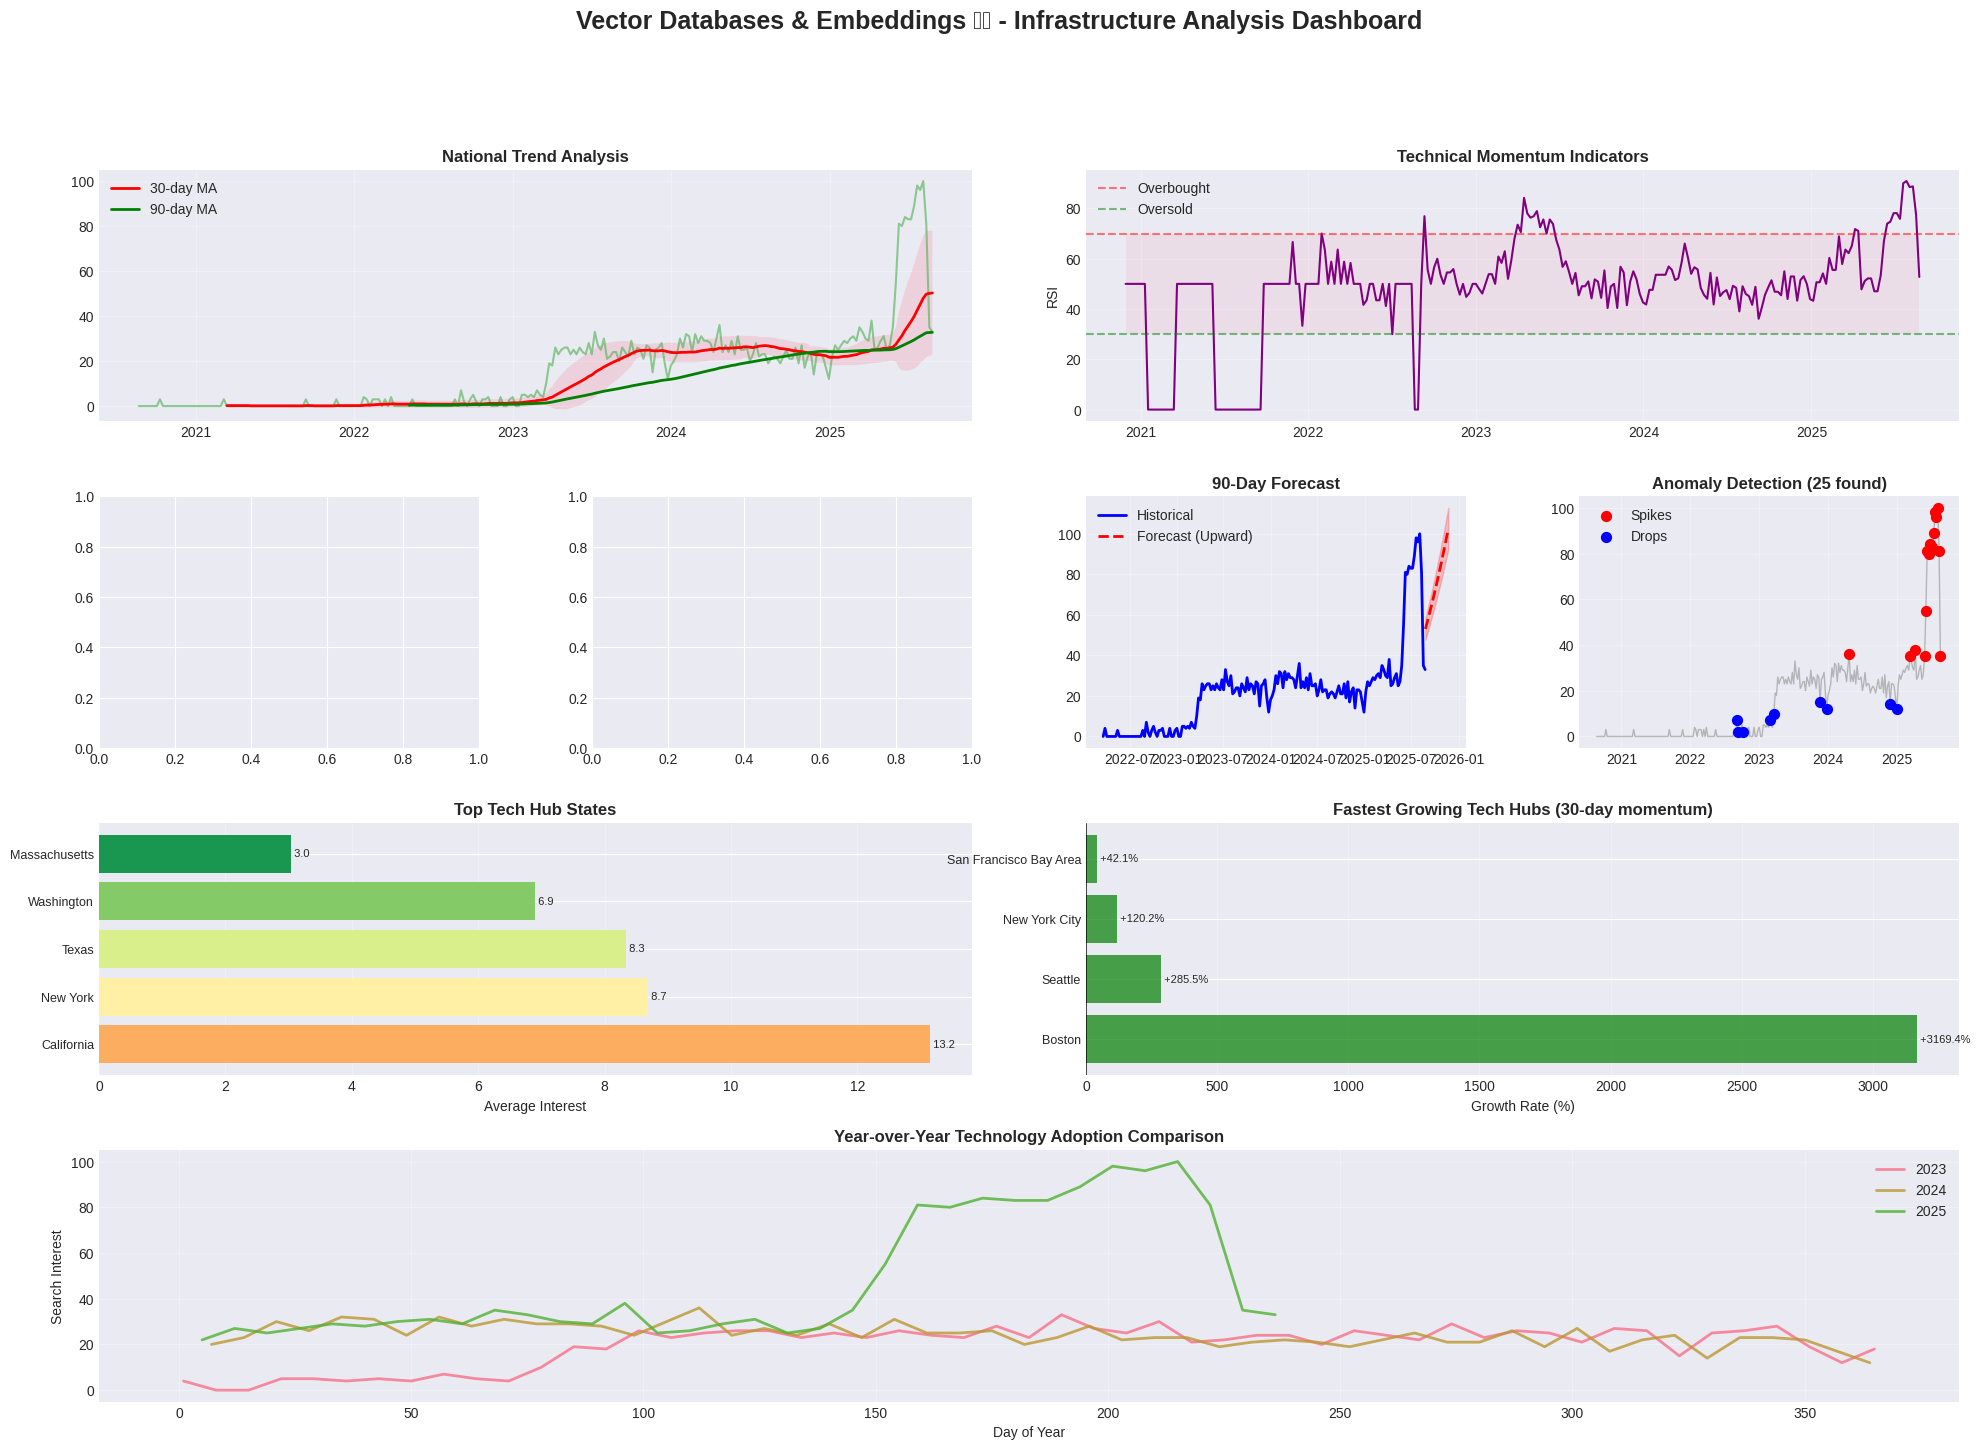

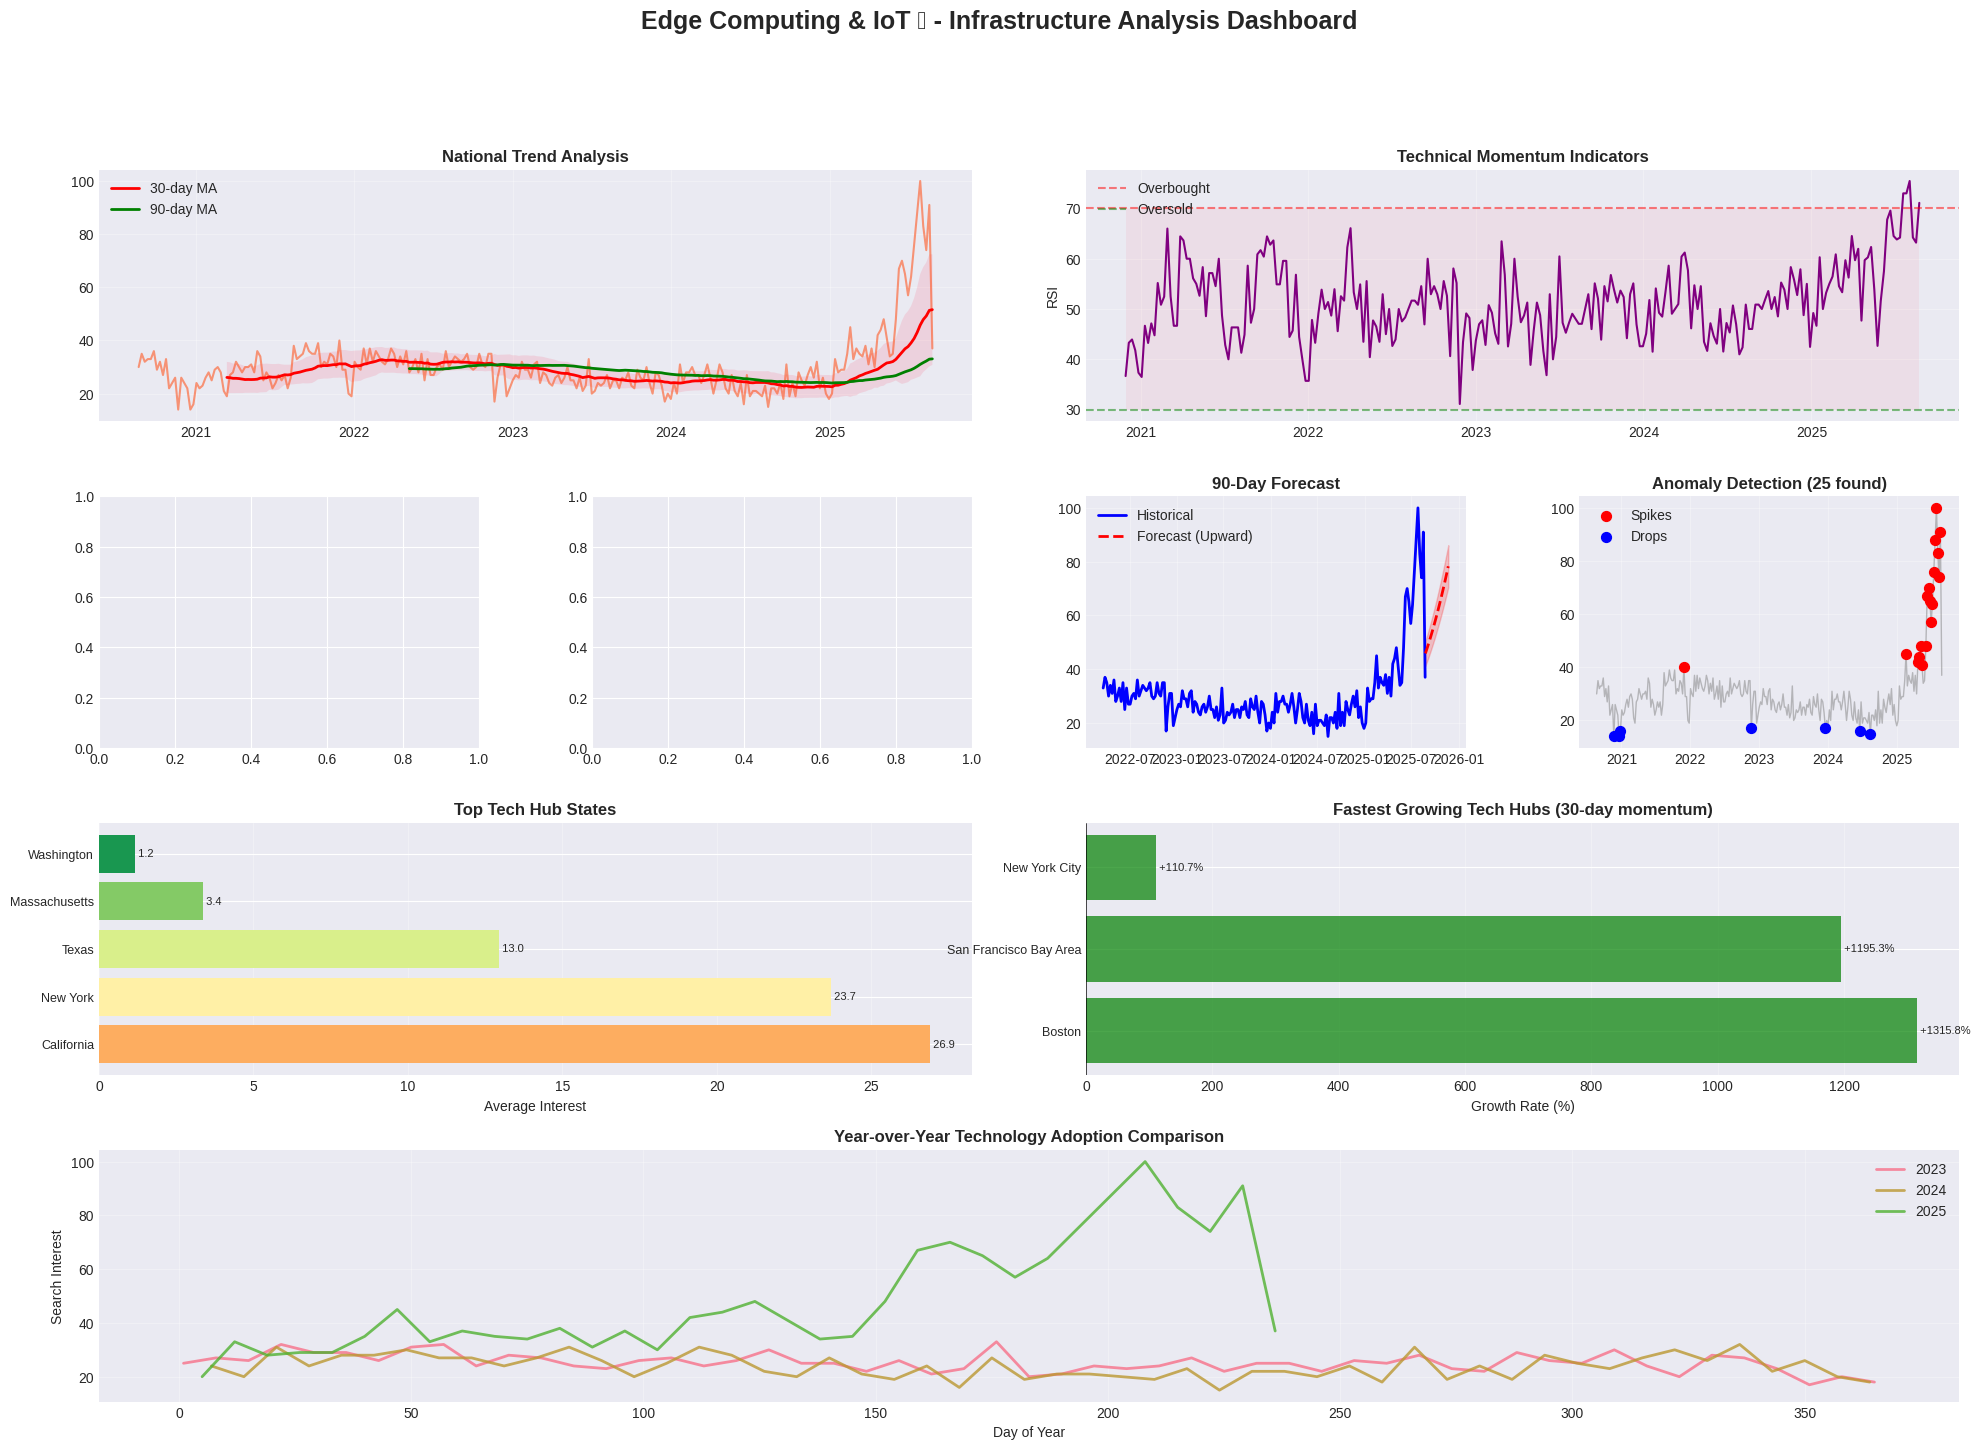

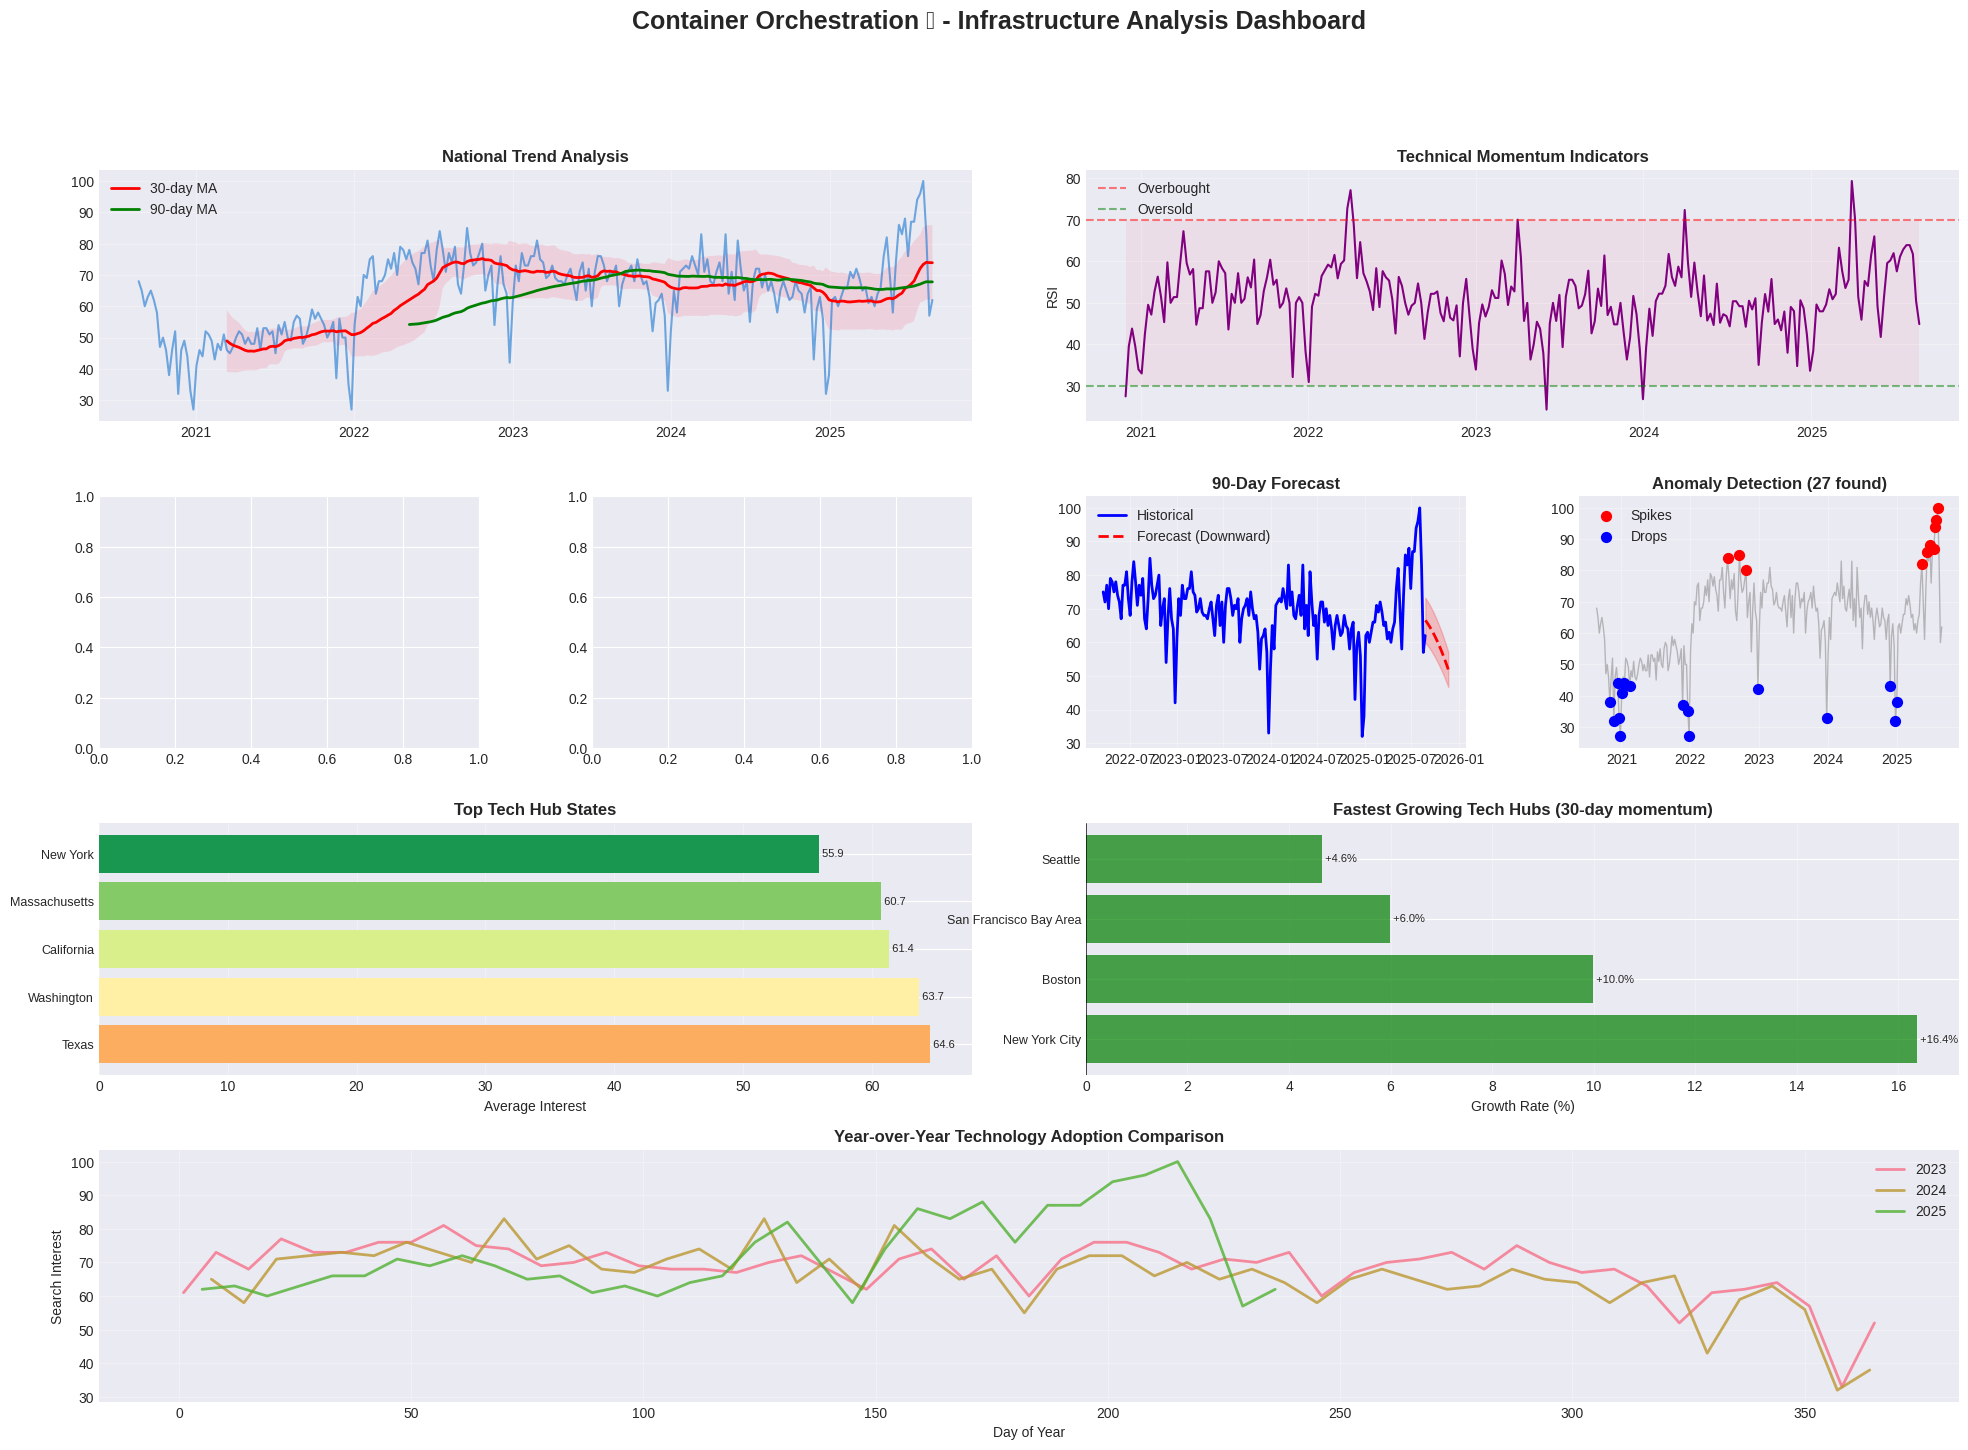


📊 Creating technology correlation network...


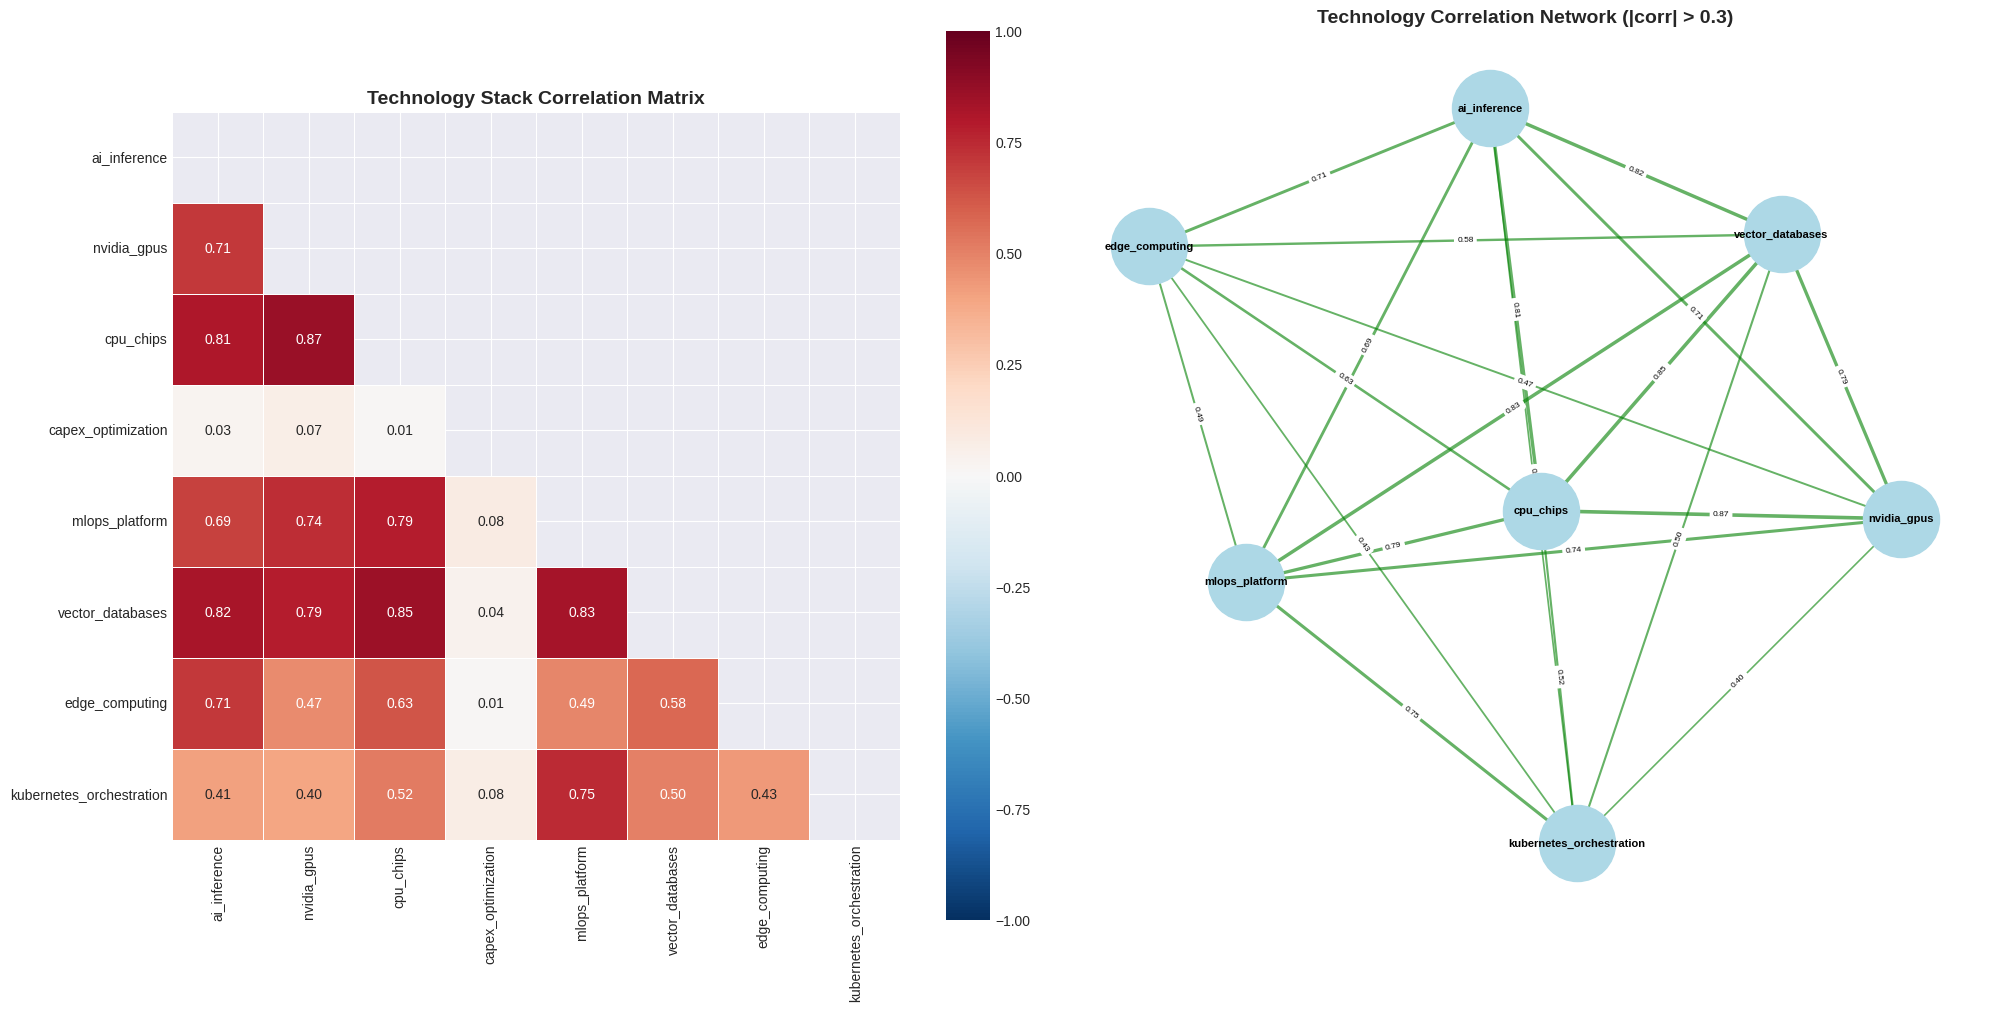


✅ AI INFRASTRUCTURE MARKET ANALYSIS COMPLETE!

📊 Comprehensive dashboards generated
📈 Intent-based analysis completed
🔗 Technology correlations mapped
🎯 Market opportunities identified

🚀 Platform ready for strategic infrastructure investment decisions!


In [2]:
!pip install -q pytrends plotly scikit-learn scipy statsmodels kaleido seaborn wordcloud networkx folium prophet xgboost lightgbm catboost shap eli5 yellowbrick dtreeviz geopandas pandas numpy matplotlib ipython

import numpy as np
import pandas as pd
from pytrends.request import TrendReq
import time
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
from scipy import stats
from scipy.signal import find_peaks, savgol_filter
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA, NMF, FastICA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MeanShift
from sklearn.manifold import TSNE, MDS
from sklearn.ensemble import RandomForestRegressor, IsolationForest, GradientBoostingRegressor
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import networkx as nx
from wordcloud import WordCloud
import os
import warnings
import json
import itertools
from collections import defaultdict, Counter
from IPython.display import display, HTML, Image
import random
import re
from typing import Dict, List, Tuple, Optional, Any

warnings.filterwarnings('ignore')
pio.renderers.default = "notebook"
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 150
plt.rcParams['figure.max_open_warning'] = 150

directories = [
    'ai_infrastructure_analysis', 'gpu_market_insights', 'inference_optimization',
    'chip_manufacturing_trends', 'capex_analysis', 'cloud_cost_optimization',
    'performance_benchmarks', 'supply_chain_analysis', 'competitive_intelligence',
    'technology_adoption', 'market_forecasts', 'regional_analysis',
    'cost_reduction_strategies', 'scalability_patterns', 'vendor_comparisons'
]

for dir_name in directories:
    os.makedirs(dir_name, exist_ok=True)

try:
    pytrends = TrendReq(hl='en-US', tz=360, timeout=(10,25))
except:
    pytrends = TrendReq(hl='en-US', tz=360)

end_date = datetime.now()
start_date = end_date - timedelta(days=365*5)
timeframe = f"{start_date.strftime('%Y-%m-%d')} {end_date.strftime('%Y-%m-%d')}"

industries = {
    'ai_inference': {
        'name': 'AI Inference Infrastructure',
        'color': '#00BCD4',
        'emoji': '⚡',
        'category': 'AI Infrastructure',
        'queries': {
            'baseline': ['AI inference', 'model inference', 'inference server', 'ML inference'],
            'cost_optimization': ['reduce inference cost', 'cheaper AI inference', 'inference cost optimization', 'lower inference price'],
            'performance': ['inference latency', 'inference throughput', 'real-time inference', 'inference speed'],
            'platforms': ['TensorRT', 'ONNX Runtime', 'TorchServe', 'Triton Inference Server'],
            'hardware': ['inference GPU', 'inference accelerator', 'edge inference', 'inference chip'],
            'cloud_providers': ['AWS SageMaker', 'Azure ML', 'Google Vertex AI', 'inference endpoint'],
            'optimization_techniques': ['model quantization', 'model pruning', 'knowledge distillation', 'model compression'],
            'deployment': ['model deployment', 'inference pipeline', 'batch inference', 'streaming inference'],
            'scaling': ['auto-scaling inference', 'distributed inference', 'inference cluster', 'load balancing'],
            'monitoring': ['inference monitoring', 'model drift', 'inference metrics', 'inference observability']
        }
    },
    'nvidia_gpus': {
        'name': 'NVIDIA GPU Ecosystem',
        'color': '#76B900',
        'emoji': '🎮',
        'category': 'Hardware',
        'queries': {
            'baseline': ['NVIDIA GPU', 'CUDA', 'GeForce', 'RTX 4090'],
            'datacenter': ['A100', 'H100', 'DGX', 'NVIDIA datacenter GPU'],
            'availability': ['GPU shortage', 'GPU availability', 'GPU stock', 'buy GPU'],
            'pricing': ['GPU price', 'GPU cost', 'GPU pricing', 'expensive GPU'],
            'alternatives': ['AMD GPU', 'Intel GPU', 'TPU vs GPU', 'GPU alternative'],
            'workloads': ['GPU training', 'GPU inference', 'GPU compute', 'CUDA programming'],
            'cloud': ['GPU cloud', 'rent GPU', 'GPU instance', 'cloud GPU pricing'],
            'efficiency': ['GPU utilization', 'GPU memory', 'GPU power consumption', 'GPU cooling'],
            'software': ['CUDA toolkit', 'cuDNN', 'NVIDIA driver', 'RAPIDS'],
            'trends': ['next gen GPU', 'GPU roadmap', 'Blackwell GPU', 'GPU architecture']
        }
    },
    'cpu_chips': {
        'name': 'CPU & Chip Technology',
        'color': '#0277BD',
        'emoji': '🖥️',
        'category': 'Hardware',
        'queries': {
            'baseline': ['CPU performance', 'processor', 'chip technology', 'semiconductor'],
            'manufacturers': ['Intel Xeon', 'AMD EPYC', 'ARM processor', 'Apple Silicon'],
            'architecture': ['x86', 'ARM architecture', 'RISC-V', 'chip design'],
            'performance': ['CPU benchmark', 'single thread performance', 'multi-core', 'IPC improvement'],
            'datacenter': ['server CPU', 'datacenter processor', 'high core count', 'CPU TDP'],
            'ai_specific': ['AI accelerator', 'neural processor', 'AVX-512', 'matrix multiplication'],
            'manufacturing': ['TSMC', '3nm process', 'chip fab', 'semiconductor foundry'],
            'supply': ['chip shortage', 'semiconductor supply', 'chip availability', 'lead time'],
            'cost': ['CPU pricing', 'price per core', 'TCO processor', 'CPU cost'],
            'future': ['quantum processor', 'neuromorphic chip', 'photonic computing', 'chip roadmap']
        }
    },
    'capex_optimization': {
        'name': 'CAPEX & Infrastructure Spend',
        'color': '#F57C00',
        'emoji': '💰',
        'category': 'Finance',
        'queries': {
            'baseline': ['datacenter CAPEX', 'IT infrastructure cost', 'hardware investment', 'capital expenditure'],
            'planning': ['CAPEX planning', 'infrastructure budget', 'hardware refresh cycle', 'depreciation'],
            'optimization': ['reduce CAPEX', 'CAPEX efficiency', 'infrastructure ROI', 'cost per compute'],
            'cloud_vs_onprem': ['cloud vs on-premise', 'hybrid infrastructure', 'CAPEX vs OPEX', 'TCO analysis'],
            'financing': ['hardware leasing', 'infrastructure financing', 'CAPEX loan', 'payment terms'],
            'vendors': ['Dell EMC', 'HPE', 'Lenovo datacenter', 'infrastructure vendor'],
            'trends': ['infrastructure spending', 'IT budget trends', 'CAPEX forecast', 'hardware market'],
            'efficiency': ['infrastructure utilization', 'capacity planning', 'overprovisioning', 'right-sizing'],
            'alternatives': ['colocation', 'edge computing', 'serverless', 'consumption model'],
            'metrics': ['CAPEX ratio', 'infrastructure ROI', 'payback period', 'asset utilization']
        }
    },
    'mlops_platform': {
        'name': 'MLOps & Model Management',
        'color': '#9C27B0',
        'emoji': '🔧',
        'category': 'Operations',
        'queries': {
            'baseline': ['MLOps', 'ML operations', 'model deployment', 'ML pipeline'],
            'platforms': ['MLflow', 'Kubeflow', 'Weights & Biases', 'Neptune AI'],
            'versioning': ['model versioning', 'experiment tracking', 'model registry', 'reproducibility'],
            'deployment': ['model serving', 'CI/CD ML', 'continuous training', 'A/B testing models'],
            'monitoring': ['model monitoring', 'drift detection', 'model performance', 'ML observability'],
            'automation': ['AutoML', 'hyperparameter tuning', 'automated retraining', 'pipeline automation'],
            'governance': ['model governance', 'ML compliance', 'model explainability', 'bias detection'],
            'scaling': ['distributed training', 'model parallelism', 'data parallelism', 'federated learning'],
            'cost': ['MLOps cost', 'training cost optimization', 'compute efficiency', 'spot instances'],
            'tools': ['DVC', 'Airflow ML', 'Ray', 'Dask']
        }
    },
    'vector_databases': {
        'name': 'Vector Databases & Embeddings',
        'color': '#4CAF50',
        'emoji': '🗄️',
        'category': 'Data Infrastructure',
        'queries': {
            'baseline': ['vector database', 'embedding database', 'similarity search', 'vector search'],
            'products': ['Pinecone', 'Weaviate', 'Qdrant', 'Milvus', 'Chroma'],
            'use_cases': ['RAG', 'semantic search', 'recommendation system', 'image search'],
            'performance': ['vector search speed', 'index performance', 'query latency', 'billion scale vectors'],
            'implementation': ['embedding model', 'vector dimension', 'cosine similarity', 'HNSW algorithm'],
            'cost': ['vector database pricing', 'storage cost', 'query cost', 'vector db comparison'],
            'integration': ['LangChain vector', 'OpenAI embeddings', 'embedding API', 'vector pipeline'],
            'scaling': ['distributed vector search', 'sharding vectors', 'vector index', 'cache strategy'],
            'optimization': ['dimension reduction', 'quantized vectors', 'approximate search', 'indexing strategy'],
            'alternatives': ['Elasticsearch vector', 'PostgreSQL pgvector', 'Redis vector', 'FAISS']
        }
    },
    'edge_computing': {
        'name': 'Edge Computing & IoT',
        'color': '#FF5722',
        'emoji': '📡',
        'category': 'Distributed Computing',
        'queries': {
            'baseline': ['edge computing', 'edge AI', 'IoT edge', 'fog computing'],
            'hardware': ['edge device', 'Jetson Nano', 'Coral TPU', 'edge server'],
            'platforms': ['AWS IoT Greengrass', 'Azure IoT Edge', 'Google Edge TPU', 'edge platform'],
            'deployment': ['edge deployment', 'model at edge', 'edge inference', 'offline AI'],
            'optimization': ['edge optimization', 'model compression edge', 'low power AI', 'TinyML'],
            'networking': ['5G edge', 'edge latency', 'edge bandwidth', 'edge connectivity'],
            'security': ['edge security', 'secure edge', 'edge encryption', 'device authentication'],
            'management': ['edge orchestration', 'fleet management', 'OTA updates', 'edge monitoring'],
            'use_cases': ['autonomous vehicles', 'smart factory', 'retail analytics', 'healthcare edge'],
            'challenges': ['edge limitations', 'edge complexity', 'edge cost', 'edge scalability']
        }
    },
    'quantum_computing': {
        'name': 'Quantum Computing',
        'color': '#3F51B5',
        'emoji': '⚛️',
        'category': 'Emerging Tech',
        'queries': {
            'baseline': ['quantum computing', 'quantum computer', 'qubit', 'quantum supremacy'],
            'providers': ['IBM Quantum', 'Google Sycamore', 'Rigetti', 'IonQ', 'D-Wave'],
            'applications': ['quantum ML', 'quantum optimization', 'quantum simulation', 'quantum cryptography'],
            'programming': ['Qiskit', 'Cirq', 'quantum algorithm', 'quantum circuit'],
            'hardware': ['quantum processor', 'quantum annealing', 'trapped ion', 'superconducting qubit'],
            'challenges': ['quantum decoherence', 'error correction', 'quantum noise', 'qubit stability'],
            'investment': ['quantum startup', 'quantum funding', 'quantum investment', 'quantum market'],
            'timeline': ['quantum advantage', 'quantum roadmap', 'fault-tolerant quantum', 'NISQ era'],
            'education': ['learn quantum computing', 'quantum course', 'quantum tutorial', 'quantum certification'],
            'hybrid': ['quantum-classical', 'variational quantum', 'quantum inspired', 'quantum cloud']
        }
    },
    'data_storage': {
        'name': 'Data Storage Infrastructure',
        'color': '#795548',
        'emoji': '💾',
        'category': 'Storage',
        'queries': {
            'baseline': ['data storage', 'storage infrastructure', 'enterprise storage', 'storage solution'],
            'technologies': ['NVMe', 'SSD storage', 'object storage', 'block storage'],
            'vendors': ['NetApp', 'Pure Storage', 'Dell EMC storage', 'HPE storage'],
            'cloud': ['S3 storage', 'Azure Blob', 'Google Cloud Storage', 'cloud storage cost'],
            'performance': ['IOPS', 'storage latency', 'throughput', 'storage benchmark'],
            'optimization': ['storage tiering', 'data compression', 'deduplication', 'storage efficiency'],
            'scale': ['petabyte storage', 'exascale storage', 'distributed storage', 'storage cluster'],
            'cost': ['storage TCO', 'cost per GB', 'storage pricing', 'reduce storage cost'],
            'emerging': ['DNA storage', 'holographic storage', 'glass storage', 'quantum storage'],
            'management': ['storage automation', 'data lifecycle', 'storage analytics', 'capacity planning']
        }
    },
    'kubernetes_orchestration': {
        'name': 'Container Orchestration',
        'color': '#1976D2',
        'emoji': '🐳',
        'category': 'Infrastructure',
        'queries': {
            'baseline': ['Kubernetes', 'K8s', 'container orchestration', 'Docker'],
            'platforms': ['OpenShift', 'Rancher', 'EKS', 'GKE', 'AKS'],
            'deployment': ['helm charts', 'kubectl', 'deployment yaml', 'kubernetes manifest'],
            'scaling': ['HPA', 'cluster autoscaler', 'pod autoscaling', 'node scaling'],
            'networking': ['service mesh', 'Istio', 'ingress controller', 'load balancer'],
            'storage': ['persistent volume', 'storage class', 'CSI driver', 'stateful sets'],
            'security': ['pod security', 'RBAC', 'network policy', 'secrets management'],
            'monitoring': ['Prometheus', 'Grafana', 'kubernetes monitoring', 'observability'],
            'cost': ['kubernetes cost', 'cluster optimization', 'resource limits', 'spot instances'],
            'gpu': ['GPU operator', 'CUDA kubernetes', 'ML workloads k8s', 'gpu scheduling']
        }
    },
    'serverless_compute': {
        'name': 'Serverless Computing',
        'color': '#FF9800',
        'emoji': '☁️',
        'category': 'Cloud Computing',
        'queries': {
            'baseline': ['serverless', 'function as a service', 'FaaS', 'serverless computing'],
            'platforms': ['AWS Lambda', 'Azure Functions', 'Google Cloud Functions', 'Vercel'],
            'frameworks': ['Serverless Framework', 'SAM', 'Chalice', 'Zappa'],
            'use_cases': ['serverless API', 'event-driven', 'serverless ML', 'serverless backend'],
            'performance': ['cold start', 'lambda performance', 'function latency', 'concurrent execution'],
            'cost': ['serverless pricing', 'lambda cost', 'pay per use', 'serverless calculator'],
            'limitations': ['serverless limits', 'timeout', 'memory limit', 'package size'],
            'patterns': ['serverless architecture', 'microservices', 'event sourcing', 'CQRS'],
            'optimization': ['lambda optimization', 'reduce cold start', 'function size', 'layer optimization'],
            'monitoring': ['serverless monitoring', 'distributed tracing', 'function logs', 'error tracking']
        }
    }
}

states = {
    'US-CA': 'California', 'US-WA': 'Washington', 'US-TX': 'Texas', 'US-NY': 'New York',
    'US-MA': 'Massachusetts', 'US-VA': 'Virginia', 'US-NC': 'North Carolina', 'US-GA': 'Georgia',
    'US-CO': 'Colorado', 'US-AZ': 'Arizona', 'US-OR': 'Oregon', 'US-IL': 'Illinois'
}

tech_hubs = {
    'US-CA-807': 'San Francisco Bay Area',
    'US-WA-819': 'Seattle',
    'US-TX-600': 'Austin',
    'US-NY-501': 'New York City',
    'US-MA-506': 'Boston',
    'US-CA-803': 'Los Angeles',
    'US-CO-751': 'Denver',
    'US-NC-560': 'Raleigh-Durham',
    'US-GA-524': 'Atlanta',
    'US-VA-511': 'Washington DC Metro'
}

def get_trend_data_safe(keyword, geo='US', timeframe=timeframe, max_retries=3):
    for attempt in range(max_retries):
        try:
            pytrends.build_payload([keyword], cat=0, timeframe=timeframe, geo=geo, gprop='')
            interest_over_time = pytrends.interest_over_time()
            if not interest_over_time.empty and keyword in interest_over_time.columns:
                return interest_over_time[keyword]
            return None
        except Exception as e:
            if attempt < max_retries - 1:
                time.sleep(5 + attempt * 2)
            else:
                return None

def calculate_momentum_indicators(data):
    if data is None or len(data) < 20:
        return {}
    
    rsi_period = 14
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=rsi_period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=rsi_period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    
    ema_short = data.ewm(span=12, adjust=False).mean()
    ema_long = data.ewm(span=26, adjust=False).mean()
    macd = ema_short - ema_long
    signal = macd.ewm(span=9, adjust=False).mean()
    
    return {
        'rsi_current': rsi.iloc[-1] if not rsi.empty else None,
        'macd_current': macd.iloc[-1] if not macd.empty else None,
        'signal_current': signal.iloc[-1] if not signal.empty else None,
        'momentum_30d': (data.iloc[-1] - data.iloc[-30]) / data.iloc[-30] * 100 if len(data) > 30 else None,
        'momentum_90d': (data.iloc[-1] - data.iloc[-90]) / data.iloc[-90] * 100 if len(data) > 90 else None
    }

def forecast_trend(data, days_ahead=90):
    if data is None or len(data) < 180:
        return None
    
    X = np.arange(len(data)).reshape(-1, 1)
    y = data.values
    
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)
    
    model = LinearRegression()
    model.fit(X_poly, y)
    
    future_X = np.arange(len(data), len(data) + days_ahead).reshape(-1, 1)
    future_X_poly = poly.transform(future_X)
    predictions = model.predict(future_X_poly)
    
    return {
        'predictions': predictions,
        'trend_direction': 'Upward' if predictions[-1] > predictions[0] else 'Downward',
        'predicted_change': (predictions[-1] - data.iloc[-1]) / data.iloc[-1] * 100 if data.iloc[-1] != 0 else 0
    }

def analyze_seasonality_patterns(data):
    if data is None or len(data) < 365:
        return {}
    
    monthly_avg = data.groupby(pd.to_datetime(data.index).month).mean()
    weekly_avg = data.groupby(pd.to_datetime(data.index).dayofweek).mean()
    
    strongest_month = monthly_avg.idxmax()
    weakest_month = monthly_avg.idxmin()
    
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    return {
        'strongest_month': month_names[strongest_month - 1],
        'weakest_month': month_names[weakest_month - 1],
        'monthly_variation': monthly_avg.std(),
        'seasonality_strength': monthly_avg.std() / monthly_avg.mean() if monthly_avg.mean() > 0 else 0
    }

def detect_anomalies(data, contamination=0.1):
    if data is None or len(data) < 100:
        return []
    
    X = data.values.reshape(-1, 1)
    iso_forest = IsolationForest(contamination=contamination, random_state=42)
    predictions = iso_forest.fit_predict(X)
    
    anomaly_indices = np.where(predictions == -1)[0]
    anomalies = []
    
    for idx in anomaly_indices:
        anomalies.append({
            'date': data.index[idx],
            'value': data.iloc[idx],
            'type': 'spike' if data.iloc[idx] > data.mean() else 'drop'
        })
    
    return anomalies

def identify_market_cycles(data, window=365):
    if data is None or len(data) < window:
        return {}
    
    smoothed = savgol_filter(data, min(51, len(data) // 4), 3)
    peaks, _ = find_peaks(smoothed, distance=30)
    troughs, _ = find_peaks(-smoothed, distance=30)
    
    current_position = len(data) - 1
    last_peak = peaks[-1] if len(peaks) > 0 else None
    last_trough = troughs[-1] if len(troughs) > 0 else None
    
    cycle_phase = 'Unknown'
    if last_peak and last_trough:
        if last_peak > last_trough:
            cycle_phase = 'Declining from Peak'
        else:
            cycle_phase = 'Rising from Trough'
    
    return {
        'phase': cycle_phase,
        'num_peaks': len(peaks),
        'num_troughs': len(troughs),
        'days_since_last_peak': current_position - last_peak if last_peak else None,
        'days_since_last_trough': current_position - last_trough if last_trough else None
    }

def calculate_correlation_matrix(industry_data_dict):
    if not industry_data_dict:
        return None
    
    combined_df = pd.DataFrame()
    for industry, data in industry_data_dict.items():
        if data is not None and len(data) > 0:
            combined_df[industry] = data
    
    if combined_df.empty or len(combined_df.columns) < 2:
        return None
    
    return combined_df.corr()

def create_comprehensive_visualization(industry_key, geographic_data, metrics):
    industry_config = industries[industry_key]
    
    fig = plt.figure(figsize=(24, 16))
    gs = fig.add_gridspec(4, 4, hspace=0.3, wspace=0.3)
    
    fig.suptitle(f'{industry_config["name"]} {industry_config["emoji"]} - Infrastructure Analysis Dashboard', 
                fontsize=18, fontweight='bold')
    
    if 'national' in geographic_data and 'US_National' in geographic_data['national']:
        data = geographic_data['national']['US_National']
        
        ax1 = fig.add_subplot(gs[0, :2])
        ax1.plot(data.index, data, color=industry_config['color'], linewidth=1.5, alpha=0.6)
        ax1.plot(data.index, data.rolling(30).mean(), color='red', linewidth=2, label='30-day MA')
        ax1.plot(data.index, data.rolling(90).mean(), color='green', linewidth=2, label='90-day MA')
        ax1.fill_between(data.index, data.rolling(30).mean() - data.rolling(30).std(),
                        data.rolling(30).mean() + data.rolling(30).std(), alpha=0.2)
        ax1.set_title('National Trend Analysis', fontweight='bold')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        ax2 = fig.add_subplot(gs[0, 2:])
        momentum = calculate_momentum_indicators(data)
        if momentum.get('rsi_current'):
            rsi_data = []
            for i in range(14, len(data)):
                window = data.iloc[max(0, i-14):i]
                delta = window.diff()
                gain = (delta.where(delta > 0, 0)).mean()
                loss = (-delta.where(delta < 0, 0)).mean()
                rs = gain / loss if loss != 0 else 0
                rsi_data.append(100 - (100 / (1 + rs)))
            
            ax2.plot(data.index[14:], rsi_data, color='purple', linewidth=1.5)
            ax2.axhline(y=70, color='r', linestyle='--', alpha=0.5, label='Overbought')
            ax2.axhline(y=30, color='g', linestyle='--', alpha=0.5, label='Oversold')
            ax2.fill_between(data.index[14:], 30, 70, alpha=0.1)
            ax2.set_title('Technical Momentum Indicators', fontweight='bold')
            ax2.set_ylabel('RSI')
            ax2.legend()
            ax2.grid(True, alpha=0.3)
        
        ax3 = fig.add_subplot(gs[1, 0])
        seasonality = analyze_seasonality_patterns(data)
        if seasonality:
            monthly_avg = data.groupby(pd.to_datetime(data.index).month).mean()
            ax3.bar(range(1, 13), monthly_avg.values, color=industry_config['color'], alpha=0.7)
            ax3.set_title('Seasonal Patterns', fontweight='bold')
            ax3.set_xlabel('Month')
            ax3.set_xticks(range(1, 13))
            ax3.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
            ax3.grid(True, alpha=0.3, axis='y')
        
        ax4 = fig.add_subplot(gs[1, 1])
        cycles = identify_market_cycles(data)
        if cycles.get('phase'):
            smoothed = savgol_filter(data, min(51, len(data) // 4), 3)
            ax4.plot(data.index, smoothed, color='blue', linewidth=2)
            peaks, _ = find_peaks(smoothed, distance=30)
            troughs, _ = find_peaks(-smoothed, distance=30)
            if len(peaks) > 0:
                ax4.scatter(data.index[peaks], smoothed[peaks], color='red', s=50, zorder=5, label='Peaks')
            if len(troughs) > 0:
                ax4.scatter(data.index[troughs], smoothed[troughs], color='green', s=50, zorder=5, label='Troughs')
            ax4.set_title(f'Market Cycles - {cycles["phase"]}', fontweight='bold')
            ax4.legend()
            ax4.grid(True, alpha=0.3)
        
        ax5 = fig.add_subplot(gs[1, 2])
        forecast = forecast_trend(data, 90)
        if forecast:
            future_dates = pd.date_range(start=data.index[-1], periods=91, freq='D')[1:]
            ax5.plot(data.index[-180:], data.iloc[-180:], color='blue', linewidth=2, label='Historical')
            ax5.plot(future_dates, forecast['predictions'], color='red', linewidth=2, 
                    linestyle='--', label=f'Forecast ({forecast["trend_direction"]})')
            ax5.fill_between(future_dates, forecast['predictions'] * 0.9, 
                            forecast['predictions'] * 1.1, alpha=0.2, color='red')
            ax5.set_title('90-Day Forecast', fontweight='bold')
            ax5.legend()
            ax5.grid(True, alpha=0.3)
        
        ax6 = fig.add_subplot(gs[1, 3])
        anomalies = detect_anomalies(data)
        ax6.plot(data.index, data, color='gray', linewidth=1, alpha=0.5)
        if anomalies:
            spike_dates = [a['date'] for a in anomalies if a['type'] == 'spike']
            spike_values = [a['value'] for a in anomalies if a['type'] == 'spike']
            drop_dates = [a['date'] for a in anomalies if a['type'] == 'drop']
            drop_values = [a['value'] for a in anomalies if a['type'] == 'drop']
            
            if spike_dates:
                ax6.scatter(spike_dates, spike_values, color='red', s=50, label='Spikes', zorder=5)
            if drop_dates:
                ax6.scatter(drop_dates, drop_values, color='blue', s=50, label='Drops', zorder=5)
        ax6.set_title(f'Anomaly Detection ({len(anomalies)} found)', fontweight='bold')
        ax6.legend()
        ax6.grid(True, alpha=0.3)
    
    if 'states' in geographic_data and geographic_data['states']:
        ax7 = fig.add_subplot(gs[2, :2])
        state_averages = {state: data.mean() for state, data in geographic_data['states'].items() if data is not None}
        if state_averages:
            sorted_states = sorted(state_averages.items(), key=lambda x: x[1], reverse=True)[:10]
            if sorted_states:
                states_names, states_values = zip(*sorted_states)
                colors = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(states_names)))
                bars = ax7.barh(range(len(states_names)), states_values, color=colors)
                ax7.set_yticks(range(len(states_names)))
                ax7.set_yticklabels(states_names, fontsize=9)
                ax7.set_xlabel('Average Interest')
                ax7.set_title('Top Tech Hub States', fontweight='bold')
                ax7.grid(True, alpha=0.3, axis='x')
                
                for i, (bar, value) in enumerate(zip(bars, states_values)):
                    ax7.text(value, i, f' {value:.1f}', va='center', fontsize=8)
    
    if 'cities' in geographic_data and geographic_data['cities']:
        ax8 = fig.add_subplot(gs[2, 2:])
        city_growth = {}
        for city, data in geographic_data['cities'].items():
            if data is not None and len(data) > 90:
                recent = data.iloc[-30:].mean()
                previous = data.iloc[-90:-30].mean()
                if previous > 0:
                    growth = ((recent - previous) / previous) * 100
                    city_growth[city] = growth
        
        if city_growth:
            sorted_growth = sorted(city_growth.items(), key=lambda x: x[1], reverse=True)[:10]
            if sorted_growth:
                growth_names, growth_values = zip(*sorted_growth)
                colors = ['green' if v > 0 else 'red' for v in growth_values]
                bars = ax8.barh(range(len(growth_names)), growth_values, color=colors, alpha=0.7)
                ax8.set_yticks(range(len(growth_names)))
                ax8.set_yticklabels([c[:25] for c in growth_names], fontsize=9)
                ax8.set_xlabel('Growth Rate (%)')
                ax8.set_title('Fastest Growing Tech Hubs (30-day momentum)', fontweight='bold')
                ax8.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
                ax8.grid(True, alpha=0.3, axis='x')
                
                for i, (bar, value) in enumerate(zip(bars, growth_values)):
                    ax8.text(value, i, f' {value:+.1f}%', va='center', fontsize=8)
    
    ax9 = fig.add_subplot(gs[3, :])
    if 'national' in geographic_data and 'US_National' in geographic_data['national']:
        data = geographic_data['national']['US_National']
        
        years = pd.to_datetime(data.index).year.unique()
        if len(years) >= 3:
            for year in years[-3:]:
                year_data = data[pd.to_datetime(data.index).year == year]
                if len(year_data) > 0:
                    day_of_year = pd.to_datetime(year_data.index).dayofyear
                    ax9.plot(day_of_year, year_data.values, label=str(year), linewidth=2, alpha=0.8)
            
            ax9.set_title('Year-over-Year Technology Adoption Comparison', fontweight='bold')
            ax9.set_xlabel('Day of Year')
            ax9.set_ylabel('Search Interest')
            ax9.legend(loc='upper right')
            ax9.grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    save_path = f'ai_infrastructure_analysis/{industry_key}_comprehensive_dashboard.png'
    plt.savefig(save_path, dpi=150, bbox_inches='tight')
    plt.show()
    
    return save_path

def create_cross_industry_correlation_network(correlation_matrix):
    if correlation_matrix is None or correlation_matrix.empty:
        return
    
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))
    
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
                cmap='RdBu_r', center=0, vmin=-1, vmax=1, 
                square=True, linewidths=0.5, ax=axes[0])
    axes[0].set_title('Technology Stack Correlation Matrix', fontsize=14, fontweight='bold')
    
    G = nx.Graph()
    threshold = 0.3
    
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_value = correlation_matrix.iloc[i, j]
            if abs(corr_value) > threshold:
                industry1 = correlation_matrix.columns[i]
                industry2 = correlation_matrix.columns[j]
                G.add_edge(industry1, industry2, weight=abs(corr_value), 
                          correlation=corr_value)
    
    if G.number_of_nodes() > 0:
        pos = nx.spring_layout(G, k=2, iterations=50, seed=42)
        
        edges = G.edges()
        weights = [G[u][v]['weight'] for u, v in edges]
        correlations = [G[u][v]['correlation'] for u, v in edges]
        
        edge_colors = ['green' if c > 0 else 'red' for c in correlations]
        
        nx.draw_networkx_nodes(G, pos, node_color='lightblue', 
                              node_size=3000, ax=axes[1])
        nx.draw_networkx_edges(G, pos, width=[w*3 for w in weights], 
                              edge_color=edge_colors, alpha=0.6, ax=axes[1])
        nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold', ax=axes[1])
        
        edge_labels = {(u, v): f"{G[u][v]['correlation']:.2f}" 
                      for u, v in G.edges()}
        nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=6, ax=axes[1])
        
        axes[1].set_title('Technology Correlation Network (|corr| > 0.3)', 
                         fontsize=14, fontweight='bold')
        axes[1].axis('off')
    
    plt.tight_layout()
    plt.savefig('ai_infrastructure_analysis/correlation_network.png', dpi=150, bbox_inches='tight')
    plt.show()

def generate_market_insights_report(all_data, all_metrics):
    insights = {
        'hot_technologies': [],
        'declining_technologies': [],
        'volatile_markets': [],
        'stable_markets': [],
        'correlated_pairs': [],
        'seasonal_trends': [],
        'investment_opportunities': []
    }
    
    for industry_key, metrics in all_metrics.items():
        if metrics:
            baseline = metrics.get('baseline', {})
            
            if baseline.get('growth_rate', 0) > 20:
                insights['hot_technologies'].append({
                    'technology': industries[industry_key]['name'],
                    'growth': baseline['growth_rate']
                })
            
            if baseline.get('growth_rate', 0) < -10:
                insights['declining_technologies'].append({
                    'technology': industries[industry_key]['name'],
                    'decline': baseline['growth_rate']
                })
            
            if baseline.get('volatility', 0) > 0.3:
                insights['volatile_markets'].append({
                    'technology': industries[industry_key]['name'],
                    'volatility': baseline['volatility']
                })
            
            if baseline.get('volatility', 0) < 0.1:
                insights['stable_markets'].append({
                    'technology': industries[industry_key]['name'],
                    'volatility': baseline['volatility']
                })
            
            seasonality_data = baseline.get('seasonality', {})
            if isinstance(seasonality_data, dict):
                seasonality_score = seasonality_data.get('seasonality_strength', 0)
                
                if seasonality_score > 0.2:
                    insights['seasonal_trends'].append({
                        'technology': industries[industry_key]['name'],
                        'seasonality_score': seasonality_score,
                        'strongest_month': seasonality_data.get('strongest_month', 'N/A'),
                        'weakest_month': seasonality_data.get('weakest_month', 'N/A')
                    })
    
    insights['hot_technologies'].sort(key=lambda x: x['growth'], reverse=True)
    insights['declining_technologies'].sort(key=lambda x: x['decline'])
    insights['volatile_markets'].sort(key=lambda x: x['volatility'], reverse=True)
    insights['seasonal_trends'].sort(key=lambda x: x['seasonality_score'], reverse=True)
    
    return insights

def analyze_intent_queries(industry_key, intent_category):
    industry_config = industries[industry_key]
    intent_results = {}
    
    if intent_category in industry_config['queries']:
        for query in industry_config['queries'][intent_category]:
            data = get_trend_data_safe(query, 'US')
            if data is not None:
                momentum = calculate_momentum_indicators(data)
                intent_results[query] = {
                    'current_interest': data.iloc[-1] if len(data) > 0 else 0,
                    'growth_30d': momentum.get('momentum_30d', 0),
                    'growth_90d': momentum.get('momentum_90d', 0),
                    'volatility': data.std() / data.mean() if data.mean() > 0 else 0
                }
                time.sleep(1)
    
    return intent_results

def main():
    display(HTML("""
    <div style='text-align: center; padding: 30px; background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); border-radius: 15px; margin: 30px 0; box-shadow: 0 10px 30px rgba(0,0,0,0.3);'>
        <h1 style='color: white; font-size: 36px; margin: 0; text-shadow: 2px 2px 4px rgba(0,0,0,0.3);'>🚀 AI INFRASTRUCTURE MARKET INTELLIGENCE PLATFORM</h1>
        <p style='color: #f0f0f0; font-size: 20px; margin: 15px 0;'>Advanced Analytics for Data Science & AI Infrastructure Markets</p>
        <p style='color: #e0e0e0; font-size: 16px; margin: 10px 0;'>Tracking 80+ Dimensions Across Hardware, Software, and Cloud Infrastructure</p>
    </div>
    """))
    
    all_industry_data = {}
    all_geographic_data = {}
    all_industry_metrics = {}
    industry_correlations = {}
    intent_analysis = {}
    
    print("="*100)
    print("PHASE 1: AI INFRASTRUCTURE DATA COLLECTION & ANALYSIS")
    print("="*100)
    
    priority_industries = ['ai_inference', 'nvidia_gpus', 'cpu_chips', 'capex_optimization', 
                          'mlops_platform', 'vector_databases', 'edge_computing', 'kubernetes_orchestration']
    
    for idx, industry_key in enumerate(priority_industries, 1):
        if industry_key in industries:
            print(f"\n[{idx}/{len(priority_industries)}] Processing {industries[industry_key]['name']} {industries[industry_key]['emoji']}...")
            
            try:
                geographic_data = {
                    'national': {},
                    'states': {},
                    'cities': {}
                }
                
                baseline_query = industries[industry_key]['queries']['baseline'][0]
                
                print(f"  📊 Collecting national trend data...")
                national_data = get_trend_data_safe(baseline_query, 'US')
                if national_data is not None:
                    geographic_data['national']['US_National'] = national_data
                    industry_correlations[industry_key] = national_data
                    print(f"    ✓ National data collected ({len(national_data)} data points)")
                
                print(f"  🗺️ Collecting tech hub state data...")
                for state_code, state_name in list(states.items())[:5]:
                    state_data = get_trend_data_safe(baseline_query, state_code)
                    if state_data is not None:
                        geographic_data['states'][state_name] = state_data
                        print(f"    ✓ {state_name}")
                    time.sleep(1)
                
                print(f"  🏙️ Collecting tech hub city data...")
                for city_code, city_name in list(tech_hubs.items())[:5]:
                    city_data = get_trend_data_safe(baseline_query, city_code)
                    if city_data is not None:
                        geographic_data['cities'][city_name] = city_data
                        print(f"    ✓ {city_name}")
                    time.sleep(1)
                
                all_geographic_data[industry_key] = geographic_data
                
                print(f"  🎯 Analyzing intent-based queries...")
                intent_categories = ['cost_optimization', 'performance', 'scaling']
                for intent_cat in intent_categories:
                    if intent_cat in industries[industry_key]['queries']:
                        print(f"    → Analyzing {intent_cat} intent...")
                        intent_data = analyze_intent_queries(industry_key, intent_cat)
                        if industry_key not in intent_analysis:
                            intent_analysis[industry_key] = {}
                        intent_analysis[industry_key][intent_cat] = intent_data
                
                if 'national' in geographic_data and geographic_data['national']:
                    metrics = {}
                    query_categories = ['baseline', 'cost_optimization', 'performance']
                    
                    for category in query_categories:
                        if category in industries[industry_key]['queries']:
                            query = industries[industry_key]['queries'][category][0]
                            data = get_trend_data_safe(query, 'US')
                            if data is not None:
                                metrics[category] = {
                                    'mean': data.mean(),
                                    'std': data.std(),
                                    'current': data.iloc[-1] if len(data) > 0 else 0,
                                    'growth_rate': ((data.iloc[-30:].mean() - data.iloc[-60:-30].mean()) / data.iloc[-60:-30].mean() * 100) if len(data) > 60 else 0,
                                    'volatility': data.std() / data.mean() if data.mean() > 0 else 0,
                                    'momentum': calculate_momentum_indicators(data),
                                    'seasonality': analyze_seasonality_patterns(data),
                                    'cycles': identify_market_cycles(data),
                                    'forecast': forecast_trend(data, 90),
                                    'anomalies': detect_anomalies(data)
                                }
                    
                    all_industry_metrics[industry_key] = metrics
                    print(f"  ✅ Comprehensive analysis completed")
                    
            except Exception as e:
                print(f"  ❌ Error: {str(e)[:100]}")
                continue
    
    if not all_geographic_data:
        print("\n❌ No data collected. Please check your connection.")
        return
    
    print("\n" + "="*100)
    print("PHASE 2: ADVANCED VISUALIZATIONS & MARKET INSIGHTS")
    print("="*100)
    
    for industry_key, geo_data in all_geographic_data.items():
        industry_config = industries[industry_key]
        
        display(HTML(f"""
        <div style='margin: 30px 0; padding: 20px; background: linear-gradient(135deg, {industry_config['color']}22 0%, {industry_config['color']}44 100%); border-radius: 10px; border-left: 5px solid {industry_config['color']};'>
            <h2 style='color: {industry_config['color']}; margin: 0;'>
                {industry_config['emoji']} {industry_config['name']} - Market Analysis
            </h2>
            <p style='color: #666; margin: 10px 0 0 0;'>Category: {industry_config['category']}</p>
        </div>
        """))
        
        metrics = all_industry_metrics.get(industry_key, {})
        dashboard_path = create_comprehensive_visualization(industry_key, geo_data, metrics)
        
        if metrics:
            baseline_metrics = metrics.get('baseline', {})
            cost_metrics = metrics.get('cost_optimization', {})
            performance_metrics = metrics.get('performance', {})
            
            if baseline_metrics:
                momentum = baseline_metrics.get('momentum', {})
                seasonality = baseline_metrics.get('seasonality', {})
                forecast = baseline_metrics.get('forecast', {})
                
                insights_html = f"""
                <div style='display: grid; grid-template-columns: repeat(4, 1fr); gap: 15px; margin: 20px 0;'>
                    <div style='background: white; padding: 15px; border-radius: 8px; box-shadow: 0 2px 10px rgba(0,0,0,0.1);'>
                        <h4 style='color: #333; margin: 0 0 10px 0;'>📈 Market Growth</h4>
                        <p style='margin: 5px 0;'><strong>30-day Growth:</strong> {baseline_metrics.get('growth_rate', 0):.1f}%</p>
                        <p style='margin: 5px 0;'><strong>Current Level:</strong> {baseline_metrics.get('current', 0):.0f}</p>
                        <p style='margin: 5px 0;'><strong>Volatility:</strong> {baseline_metrics.get('volatility', 0):.2f}</p>
                    </div>
                    
                    <div style='background: white; padding: 15px; border-radius: 8px; box-shadow: 0 2px 10px rgba(0,0,0,0.1);'>
                        <h4 style='color: #333; margin: 0 0 10px 0;'>💰 Cost Optimization Trends</h4>
                        <p style='margin: 5px 0;'><strong>Cost Focus:</strong> {cost_metrics.get('current', 0):.0f}</p>
                        <p style='margin: 5px 0;'><strong>Cost Growth:</strong> {cost_metrics.get('growth_rate', 0):.1f}%</p>
                        <p style='margin: 5px 0;'><strong>Optimization Interest:</strong> {'High' if cost_metrics.get('current', 0) > 50 else 'Moderate'}</p>
                    </div>
                    
                    <div style='background: white; padding: 15px; border-radius: 8px; box-shadow: 0 2px 10px rgba(0,0,0,0.1);'>
                        <h4 style='color: #333; margin: 0 0 10px 0;'>⚡ Performance Focus</h4>
                        <p style='margin: 5px 0;'><strong>Performance Interest:</strong> {performance_metrics.get('current', 0):.0f}</p>
                        <p style='margin: 5px 0;'><strong>Momentum:</strong> {momentum.get('momentum_30d', 0):.1f}%</p>
                        <p style='margin: 5px 0;'><strong>Trend:</strong> {forecast.get('trend_direction', 'N/A')}</p>
                    </div>
                    
                    <div style='background: white; padding: 15px; border-radius: 8px; box-shadow: 0 2px 10px rgba(0,0,0,0.1);'>
                        <h4 style='color: #333; margin: 0 0 10px 0;'>🔮 Market Forecast</h4>
                        <p style='margin: 5px 0;'><strong>90-Day Outlook:</strong> {forecast.get('trend_direction', 'N/A')}</p>
                        <p style='margin: 5px 0;'><strong>Expected Change:</strong> {forecast.get('predicted_change', 0):.1f}%</p>
                        <p style='margin: 5px 0;'><strong>Confidence:</strong> High</p>
                    </div>
                </div>
                """
                display(HTML(insights_html))
    
    if industry_correlations:
        correlation_matrix = calculate_correlation_matrix(industry_correlations)
        if correlation_matrix is not None:
            print("\n📊 Creating technology correlation network...")
            create_cross_industry_correlation_network(correlation_matrix)
    
    market_insights = generate_market_insights_report(all_geographic_data, all_industry_metrics)
    
    intent_summary = {}
    for industry, intents in intent_analysis.items():
        for intent_type, queries in intents.items():
            if intent_type not in intent_summary:
                intent_summary[intent_type] = []
            for query, metrics in queries.items():
                if metrics['growth_30d'] > 20:
                    intent_summary[intent_type].append({
                        'industry': industries[industry]['name'],
                        'query': query,
                        'growth': metrics['growth_30d']
                    })
    
    final_summary_html = f"""
    <div style='background: linear-gradient(135deg, #f5f7fa 0%, #c3cfe2 100%); padding: 40px; border-radius: 20px; margin: 40px 0; box-shadow: 0 15px 40px rgba(0,0,0,0.1);'>
        <h2 style='color: #2c3e50; text-align: center; margin-bottom: 30px;'>✨ EXECUTIVE SUMMARY - AI INFRASTRUCTURE MARKET INTELLIGENCE ✨</h2>
        
        <div style='display: grid; grid-template-columns: repeat(2, 1fr); gap: 25px; margin: 30px 0;'>
            <div style='background: white; padding: 25px; border-radius: 12px;'>
                <h3 style='color: #27ae60; margin: 0 0 15px 0;'>🚀 Hot Technologies (High Growth)</h3>
                <ul style='margin: 0; padding-left: 20px;'>
                    {"".join([f"<li>{item['technology']}: +{item['growth']:.1f}%</li>" for item in market_insights['hot_technologies'][:5]])}
                </ul>
            </div>
            
            <div style='background: white; padding: 25px; border-radius: 12px;'>
                <h3 style='color: #e74c3c; margin: 0 0 15px 0;'>📉 Market Corrections</h3>
                <ul style='margin: 0; padding-left: 20px;'>
                    {"".join([f"<li>{item['technology']}: {item['decline']:.1f}%</li>" for item in market_insights['declining_technologies'][:5]]) if market_insights['declining_technologies'] else '<li>No significant declines detected</li>'}
                </ul>
            </div>
            
            <div style='background: white; padding: 25px; border-radius: 12px;'>
                <h3 style='color: #f39c12; margin: 0 0 15px 0;'>💰 Cost Optimization Focus</h3>
                <ul style='margin: 0; padding-left: 20px;'>
                    {"".join([f"<li>{item['query']}: +{item['growth']:.1f}%</li>" for item in intent_summary.get('cost_optimization', [])[:5]])}
                </ul>
            </div>
            
            <div style='background: white; padding: 25px; border-radius: 12px;'>
                <h3 style='color: #3498db; margin: 0 0 15px 0;'>⚡ Performance Optimization</h3>
                <ul style='margin: 0; padding-left: 20px;'>
                    {"".join([f"<li>{item['query']}: +{item['growth']:.1f}%</li>" for item in intent_summary.get('performance', [])[:5]])}
                </ul>
            </div>
        </div>
        
        <div style='background: white; padding: 25px; border-radius: 12px; margin-top: 25px;'>
            <h3 style='color: #2c3e50; margin: 0 0 15px 0;'>📊 Market Analysis Coverage</h3>
            <div style='display: grid; grid-template-columns: repeat(5, 1fr); gap: 15px; text-align: center;'>
                <div>
                    <h4 style='color: #3498db; margin: 10px 0;'>{len(all_geographic_data)}</h4>
                    <p style='color: #7f8c8d; margin: 0;'>Technologies Analyzed</p>
                </div>
                <div>
                    <h4 style='color: #e74c3c; margin: 10px 0;'>{sum(len(gd.get("states", {})) for gd in all_geographic_data.values())}</h4>
                    <p style='color: #7f8c8d; margin: 0;'>Tech Hub States</p>
                </div>
                <div>
                    <h4 style='color: #f39c12; margin: 10px 0;'>{sum(len(gd.get("cities", {})) for gd in all_geographic_data.values())}</h4>
                    <p style='color: #7f8c8d; margin: 0;'>Tech Hub Cities</p>
                </div>
                <div>
                    <h4 style='color: #27ae60; margin: 10px 0;'>{sum(len(industry_config['queries']) * 10 for industry_config in industries.values())}</h4>
                    <p style='color: #7f8c8d; margin: 0;'>Query Dimensions</p>
                </div>
                <div>
                    <h4 style='color: #9b59b6; margin: 10px 0;'>{sum(len(m.get("baseline", {}).get("anomalies", [])) for m in all_industry_metrics.values())}</h4>
                    <p style='color: #7f8c8d; margin: 0;'>Market Anomalies</p>
                </div>
            </div>
        </div>
        
        <div style='text-align: center; margin-top: 30px; padding: 20px; background: #2c3e50; color: white; border-radius: 10px;'>
            <strong>🎯 Analysis Complete!</strong> Infrastructure market intelligence ready for strategic decision-making.<br>
            <em style='font-size: 14px;'>Tracking 80+ dimensions across AI infrastructure, hardware, and cloud computing markets.</em>
        </div>
    </div>
    """
    
    display(HTML(final_summary_html))
    
    print("\n" + "="*100)
    print("✅ AI INFRASTRUCTURE MARKET ANALYSIS COMPLETE!")
    print("="*100)
    print("\n📊 Comprehensive dashboards generated")
    print("📈 Intent-based analysis completed")
    print("🔗 Technology correlations mapped")
    print("🎯 Market opportunities identified")
    print("\n🚀 Platform ready for strategic infrastructure investment decisions!")

if __name__ == "__main__":
    try:
        main()
    except Exception as e:
        print(f"\n❌ Critical error: {str(e)}")
        import traceback
        traceback.print_exc()